# Project : Based on - Stack Overflow Developers Survey 2020

In [1]:
%autosave 1 

Autosaving every 1 seconds


In [2]:
# Import all the libraries

import pandas as pd
import numpy as np
import seaborn as sns

# print all the outputs in a cell

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Set values to 2 decimal places 
# Display all columns and max of 50 rows

pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

## Load the survey data into a DataFrame

In [4]:
df  = pd.read_csv('survey_results_public.csv')  # To read a csv file into a DataFrame

In [5]:
df.head(10)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.00,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.00,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Man,Flex time or a flexible schedule;Office enviro...,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Not at all important/not necessary,Curious about other opportunities;Wanting to w...,NaN,Once a year,Not sure,Yes,Yes,Occasionally: 1-2 days per quarter but less th...,NaN,NaN,Stack Overflow (public Q&A for anyone who code...,NaN,L

In [6]:
df.shape  # Tuple representing the dimension of DataFrame before cleaning

(64461, 61)

In [7]:
#df.describe(include = 'all')  # To generate Descriptive Statistics

## Cleaning the Dataset:

#### Making a copy of original DataFrame: dfdum

In [8]:
dfdum = df.copy()

#### Dropping #1 Column: Respondent

In [9]:
dfdum.drop(columns='Respondent',inplace=True)

#### Replacing long description to shorter meaningful words in #2 Column: MainBranch 

In [10]:
dfdum.MainBranch.replace(to_replace='I am a developer by profession', value= 'ProfessionalDeveloper', inplace=True)
dfdum.MainBranch.replace(to_replace='I am a student who is learning to code', value= 'StudentDeveloper', inplace=True)
dfdum.MainBranch.replace(to_replace='I am not primarily a developer, but I write code sometimes as part of my work', \
                         value= 'PartTimeDeveloper', inplace=True)
dfdum.MainBranch.replace(to_replace='I code primarily as a hobby', value= 'HobbyDeveloper', inplace=True)
dfdum.MainBranch.replace(to_replace='I used to be a developer by profession, but no longer am', \
                         value= 'PastProfDeveloper', inplace=True)

#### Replacing 'Yes' , 'No' with 1's , 0's in #3 Column: Hobbyist

In [11]:
dfdum.Hobbyist.replace(to_replace='Yes', value=1, inplace=True)

In [12]:
dfdum.Hobbyist.replace(to_replace='No', value=0, inplace=True)

#### Replacing strings with numbers in #6 Column: CompFreq

In [13]:
# To find Annualized Pay: Week = 52, Month = 12, Year = 1

dfdum.CompFreq.replace(to_replace='Monthly', value=12, inplace=True)
dfdum.CompFreq.replace(to_replace='Yearly', value=1, inplace=True)
dfdum.CompFreq.replace(to_replace='Weekly', value=52, inplace=True)

#### Renaming #7 Column: 'ConvertedComp' to 'AnnualPay' and dropping 'CompTotal' 

In [14]:
# The amount captured here is according to the pay frequency (Weekly, Monthly, Yearly)

dfdum.rename(columns={'ConvertedComp':'AnnualPay'}, inplace = True)
dfdum.drop(columns=['CompTotal'],inplace=True)

#### Dropping #8, #10, #11: ConvertedComp, CurrencyDesc, CurrencySymbol

In [15]:
dfdum.drop(columns=['CurrencyDesc','CurrencySymbol'],inplace=True)

### Using 2 functions to Clean Columns with each row containing multiple values separated by " ; ":

#### Function 'cleanup' : to fill 1's and 0's in dummy variables if row value contains the string same as dummy variable names

In [16]:
def cleanup(column_title,column_clean):
    comaparer = column_title.split('_')[1]
    dfdum[column_title] = dfdum[column_clean].str.contains(comaparer, case=False) + 0

#### Function 'clean_col' : to create dummy variables from the categorical columns

Note: 
1. We cannot use pd.get_dummies here as the values are separated by: ';'
2. We achieve this by splitting the Data into dummy variables using .split(';')

In [17]:
# Function cleans up Columns with data separated by ";" and splits it into multiple columns containing Binary data 
# with prefix (abb) passed to the function

def clean_col(column_name,abb):
    
    dfdum[column_name].fillna('Unknown', inplace = True) # Filling Nan with Unknown
    
    column_list = dfdum[column_name].to_list()           # Splitting Column's data to a variable column_list
    
    final_list = []                                      # Declaring a list to append the new column names in final_list
    
    for item in column_list:                             # Loop through the datas in a column
        
        for item2 in item.split(';'):                    # Split the data separated by ";"
            
            item2 = abb + item2                          # Adding the prefix to the new column
            
            if item2 not in final_list and item2 != abb+'Unknown': # Checking if the item is in the final_list and is 'Unknown'
                
                final_list.append(item2)                 # Append into the list
                
    for item in final_list:                              # Looping through new list of columns and call the function Cleanup
        cleanup(item, column_name)                     # Cleanup function adds the new cleaned columns to the database dfdum
                                                       # Cleanup adds 1s and 0s if it matches column_title
        
    dfdum.drop(columns = str(column_name), inplace = True)  # Drop the old Columns

#### Calling the clean_col functions for columns with data separated by ";"

In [18]:
# Two columns throws Regex error becuase of string C++
# This error was taken care by applying Lambda Function on column to replace "C++" with "Cplusplus"

dfdum['LanguageDesireNextYear']= dfdum.LanguageDesireNextYear.apply(lambda a: str(a).replace('++','plusplus'))
dfdum['LanguageWorkedWith']= dfdum.LanguageWorkedWith.apply(lambda a: str(a).replace('++','plusplus'))

In [19]:
clean_col('DatabaseDesireNextYear','DBNY_')           # Column 12
clean_col('DatabaseWorkedWith','DBWW_')               # Column 13
clean_col('DevType','DT_')                            # Column 14
clean_col('Ethnicity','Ethnicity_')                   # Column 17
clean_col('Gender','Gender_')                         # Column 18
clean_col('JobFactors','JobF_')                       # Column 19
clean_col('LanguageDesireNextYear','LDNY_')           # Column 22
clean_col('LanguageWorkedWith','LWW_')                # Column 23
clean_col('MiscTechDesireNextYear','MTNY_')           # Column 24
clean_col('MiscTechWorkedWith','MTWW_')               # Column 25
clean_col('NEWCollabToolsDesireNextYear','CTNY_')     # Column 26
clean_col('NEWCollabToolsWorkedWith','CTWW_')         # Column 27
clean_col('NEWJobHunt','JobHunt_')                    # Column 31
clean_col('NEWJobHuntResearch','JobHuntResearch_')    # Column 32
clean_col('NEWPurchaseResearch','PR_')                # Column 38
clean_col('NEWPurpleLink','MOOD_')                    # Column 39
clean_col('NEWSOSites','SO_')                         # Column 40
clean_col('NEWStuck','STUCK_')                        # Column 41
clean_col('PlatformDesireNextYear','PLNY_')           # Column 44
clean_col('PlatformWorkedWith','PLWW_')               # Column 45
clean_col('Sexuality','Sexuality_')                   # Column 47
clean_col('WebframeDesireNextYear','WFNY_')           # Column 56
clean_col('WebframeWorkedWith','WFWW_')               # Column 57

#### Converting Categorical columns to dummy variables using pd.get_dummies:

In [20]:
# Getting dummy variables for Columns: 15, 16, 21, 37, 42, 43, 52, 53, 55

dfdum = pd.get_dummies(dfdum, columns=['EdLevel', 'Employment', 'JobSeek', 'NEWOvertime', 'OpSys', \
                                       'OrgSize', 'SurveyEase', 'SurveyLength', 'UndergradMajor'])

#### Renaming dummy varaible columns for concise information:

In [21]:
# Renaming dummy variables of EdLevel Column:
dfdum.rename(columns={'EdLevel_Associate degree (A.A., A.S., etc.)':'ED_Associate_Degree',\
                     'EdLevel_Bachelor’s degree (B.A., B.S., B.Eng., etc.)':'ED_Bachelor\'s_Degree',\
                     'EdLevel_I never completed any formal education':'ED_No_Formal_Education',\
                     'EdLevel_Master’s degree (M.A., M.S., M.Eng., MBA, etc.)':'ED_Master\'s_Degree',\
                     'EdLevel_Other doctoral degree (Ph.D., Ed.D., etc.)':'ED_Doctoral_Degree',\
                     'EdLevel_Primary/elementary school':'ED_Primary_School',\
                     'EdLevel_Professional degree (JD, MD, etc.)':'ED_Professional_Degree',\
                     'EdLevel_Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)':\
                     'ED_Secondary_School',\
                     'EdLevel_Some college/university study without earning a degree':'ED_College_Without_Degree'},inplace=True)

# Renaming dummy variables of Employment Column:
dfdum.rename(columns={'Employment_Employed full-time':'Employment_Full_Time',\
                      'Employment_Employed part-time':'Employment_Part_Time',\
                      'Employment_Independent contractor, freelancer, or self-employed':'Employment_Freelancer',\
                      'Employment_Not employed, and not looking for work':'Employment_Not_Interested',\
                      'Employment_Not employed, but looking for work':'Employment_Interested'},inplace=True)

# Renaming dummy variables of JobSeek Column:
dfdum.rename(columns={'JobSeek_I am actively looking for a job':'JobSeek_Actively_Looking',\
                      'JobSeek_I am not interested in new job opportunities':'JobSeek_Not_Interested',\
                      'JobSeek_I’m not actively looking, but I am open to new opportunities':'JobSeek_Interested'},inplace=True)

# Renaming dummy variables of NEWOvertime Column:
dfdum.rename(columns={'NEWOvertime_Never':'OverTime_Never',\
                     'NEWOvertime_Occasionally: 1-2 days per quarter but less than monthly':'OverTime_Ocassionally',\
                     'NEWOvertime_Often: 1-2 days per week or more':'OverTime_Often',
                     'NEWOvertime_Rarely: 1-2 days per year or less':'OverTime_Rarely',\
                     'NEWOvertime_Sometimes: 1-2 days per month but less than weekly':'OverTime_Sometimes'}, inplace=True)

# Renaming dummy variables of OrgSize Column:
dfdum.rename(columns={'OrgSize_1,000 to 4,999 employees':'OrgSize_1000-4999',\
                      'OrgSize_10 to 19 employees':'OrgSize_10-19',\
                      'OrgSize_10,000 or more employees':'OrgSize_10000+',\
                      'OrgSize_100 to 499 employees':'OrgSize_100-499',\
                      'OrgSize_2 to 9 employees':'OrgSize_2-9',\
                      'OrgSize_20 to 99 employees':'Orgsize_20-99',\
                      'OrgSize_5,000 to 9,999 employees':'OrgSize_5000-9999',\
                      'OrgSize_500 to 999 employees':'OrgSize_500-999',\
                      'OrgSize_Just me - I am a freelancer, sole proprietor, etc.':'OrgSize_1'}, inplace=True)

# Renaming 1 dummy variable in SurveyEase Column:
dfdum.rename(columns={'SurveyEase_Neither easy nor difficult':'SurveyEase_Neutral'}, inplace = True)

# Renaming 1 dummy variable in SurveyLength Column:
dfdum.rename(columns={'SurveyLength_Appropriate in length':'SurveyLength_Appropriate'}, inplace = True)

# Renaming dummy variables in UndergradMajor Column:
dfdum.rename(columns={'UndergradMajor_A business discipline (such as accounting, finance, marketing, etc.)':\
                      'Undergrad_Business',\
                      'UndergradMajor_A health science (such as nursing, pharmacy, radiology, etc.)':\
                      'Undergrad_HealthScience',\
                      'UndergradMajor_A humanities discipline (such as literature, history, philosophy, etc.)':\
                      'Undergrad_Humanities',\
                      'UndergradMajor_A natural science (such as biology, chemistry, physics, etc.)':\
                      'Undergrad_NaturalScience',\
                      'UndergradMajor_A social science (such as anthropology, psychology, political science, etc.)':\
                      'Undergrad_SocialScience',\
                      'UndergradMajor_Another engineering discipline (such as civil, electrical, mechanical, etc.)':\
                      'Undergrad_OtherEngg',\
                      'UndergradMajor_Computer science, computer engineering, or software engineering':\
                      'Undergrad_ComputerScience',\
                      'UndergradMajor_Fine arts or performing arts (such as graphic design, music, studio art, etc.)':\
                      'Undergrad_FineArts',\
                      'UndergradMajor_I never declared a major':'Undergrad_NeverDeclared',\
                      'UndergradMajor_Information systems, information technology, or system administration':\
                      'Undergrad_InformationSys',\
                      'UndergradMajor_Mathematics or statistics':'Undergrad_MathStats',\
                      'UndergradMajor_Web development or web design':'Undergrad_WebDesign'}, inplace=True)

#### Cleaning other columns by assigning values 0, 1, 2, 3 and so on using df.loc method or dropping irrelevant columns:

Column JobSat : -2 - Very dissatisfied,
                -1 - Slightly dissatisfied,
                0 - Neither satisfied nor dissatisfied,
                1 - Slightly satisfied,
                2 - Very satisfied

In [22]:
dfdum.loc[dfdum['JobSat'] == 'Very dissatisfied', 'JobSatisfaction'] = -2
dfdum.loc[dfdum['JobSat'] == 'Slightly dissatisfied', 'JobSatisfaction'] = -1
dfdum.loc[dfdum['JobSat'] == 'Neither satisfied nor dissatisfied', 'JobSatisfaction'] = 0
dfdum.loc[dfdum['JobSat'] == 'Slightly satisfied', 'JobSatisfaction'] = 1
dfdum.loc[dfdum['JobSat'] == 'Very satisfied', 'JobSatisfaction'] = 2

In [23]:
dfdum.drop(columns = 'JobSat', inplace = True)

Column NEWDevOps : 0 - No,
                   0 - Not sure,
                   1 - Yes

In [24]:
dfdum.loc[dfdum['NEWDevOps'] == 'No', 'Have_DevOps'] = 0
dfdum.loc[dfdum['NEWDevOps'] == 'Not sure', 'Have_DevOps'] = 0
dfdum.loc[dfdum['NEWDevOps'] == 'Yes', 'Have_DevOps'] = 1

In [25]:
dfdum.drop(columns='NEWDevOps', inplace = True)

Column NEWDevOpsImpt : -2 - Not at all important,
                       -1 - Not very important,
                       0 - Neutral,
                       1 - Somewhat important,
                       2 - Extremely important

In [26]:
dfdum.loc[dfdum['NEWDevOpsImpt'] == 'Not at all important', 'DevOps_Important'] = -2
dfdum.loc[dfdum['NEWDevOpsImpt'] == 'Not very important', 'DevOps_Important'] = -1
dfdum.loc[dfdum['NEWDevOpsImpt'] == 'Neutral', 'DevOps_Important'] = 0
dfdum.loc[dfdum['NEWDevOpsImpt'] == 'Somewhat important', 'DevOps_Important'] = 1
dfdum.loc[dfdum['NEWDevOpsImpt'] == 'Extremely important', 'DevOps_Important'] = 2

In [27]:
dfdum.drop(columns = 'NEWDevOpsImpt', inplace = True)

Column NEWEdImpt : Renaming the column

In [28]:
dfdum.rename(columns={'NEWEdImpt':'FormalEdu_Important'}, inplace=True)

Column NEWLearn : 0 - Once a decade,
                  1 - Once every few years,
                  2 - Once a year,
                  3 - Every few months

In [29]:
dfdum.loc[dfdum['NEWLearn'] == 'Every few months', 'Learning_Frequency'] = 3
dfdum.loc[dfdum['NEWLearn'] == 'Once a year', 'Learning_Frequency'] = 2
dfdum.loc[dfdum['NEWLearn'] == 'Once every few years', 'Learning_Frequency'] = 1
dfdum.loc[dfdum['NEWLearn'] == 'Once a decade', 'Learning_Frequency'] = 0

In [30]:
dfdum.drop(columns = 'NEWLearn', inplace = True)

Column NEWOffTopic : The contents in this column is not relevant compared to others

In [31]:
dfdum.drop(columns = 'NEWOffTopic', inplace = True)  

Column NEWOnboardGood: 0 - No,
                       0 - Onboarding? What onboarding?,
                       1 - Yes 

In [32]:
dfdum.loc[dfdum['NEWOnboardGood'] == 'No', 'Onboarding_Good'] = 0
dfdum.loc[dfdum['NEWOnboardGood'] == 'Onboarding? What onboarding?', 'Onboarding_Good'] = 0
dfdum.loc[dfdum['NEWOnboardGood'] == 'Yes', 'Onboarding_Good'] = 1

In [33]:
dfdum.drop(columns='NEWOnboardGood', inplace = True)

Column NEWOtherComms : 0 - No, 1 - Yes

In [34]:
dfdum.loc[dfdum['NEWOtherComms'] == 'No', 'Other_DevCommunity'] = 0
dfdum.loc[dfdum['NEWOtherComms'] == 'Yes', 'Other_DevCommunity'] = 1

In [35]:
dfdum.drop(columns='NEWOtherComms', inplace = True)

Column PurchaseWhat dropped.

In [36]:
dfdum.drop(columns = 'PurchaseWhat', inplace = True)

Column SOAccount : 0 - No, 0.5 - Not sure/can't remember, 1- Yes

In [37]:
dfdum.loc[dfdum['SOAccount'] == 'No', 'SOAccount_Exist'] = 0
dfdum.loc[dfdum['SOAccount'] == 'Not sure/can\'t remember', 'SOAccount_Exist'] = 0
dfdum.loc[dfdum['SOAccount'] == 'Yes', 'SOAccount_Exist'] = 1

In [38]:
dfdum.drop(columns = 'SOAccount', inplace = True)

Column SOComm : 0 - No, not at all
                1 - No, not really
                2 - Not sure
                3 - Neutral
                4 - Yes, somewhat
                5 - Yes, definitely

In [39]:
dfdum.loc[dfdum['SOComm'] == 'No, not at all', 'SO_Community'] = 0
dfdum.loc[dfdum['SOComm'] == 'No, not really', 'SO_Community'] = 1
dfdum.loc[dfdum['SOComm'] == 'Not sure', 'SO_Community'] = 2
dfdum.loc[dfdum['SOComm'] == 'Neutral', 'SO_Community'] = 3
dfdum.loc[dfdum['SOComm'] == 'Yes, somewhat', 'SO_Community'] = 4
dfdum.loc[dfdum['SOComm'] == 'Yes, definitely', 'SO_Community'] = 5

In [40]:
dfdum.drop(columns = 'SOComm', inplace = True)

Column SOPartFreq : 0 - I have never participated in Q&A on Stack Overflow,
                    1 - Less than once per month or monthly,
                    2 - A few times per month or weekly,
                    3 - A few times per week,
                    4 - Daily or almost daily, 
                    5 - Multiple times per day

In [41]:
dfdum.loc[dfdum['SOPartFreq'] == 'Less than once per month or monthly', 'SO_PartFreq'] = 1
dfdum.loc[dfdum['SOPartFreq'] == 'A few times per month or weekly', 'SO_PartFreq'] = 2
dfdum.loc[dfdum['SOPartFreq'] == 'Multiple times per day', 'SO_PartFreq'] = 5
dfdum.loc[dfdum['SOPartFreq'] == 'I have never participated in Q&A on Stack Overflow', 'SO_PartFreq'] = 0
dfdum.loc[dfdum['SOPartFreq'] == 'A few times per week', 'SO_PartFreq'] = 3
dfdum.loc[dfdum['SOPartFreq'] == 'Daily or almost daily', 'SO_PartFreq'] = 4

In [42]:
dfdum.drop(columns = 'SOPartFreq', inplace = True)

Column SOVisitFreq: 0 - I have never visited Stack Overflow (before today),
                    1 - Less than once per month or monthly,
                    2 - A few times per month or weekly,
                    3 - A few times per week,
                    4 - Daily or almost daily, 
                    5 - Multiple times per day

In [43]:
dfdum.loc[dfdum['SOVisitFreq'] == 'Less than once per month or monthly', 'SO_VisitFreq'] = 1
dfdum.loc[dfdum['SOVisitFreq'] == 'A few times per month or weekly', 'SO_VisitFreq'] = 2
dfdum.loc[dfdum['SOVisitFreq'] == 'Multiple times per day', 'SO_VisitFreq'] = 5
dfdum.loc[dfdum['SOVisitFreq'] == 'I have never visited Stack Overflow (before today)', 'SO_VisitFreq'] = 0
dfdum.loc[dfdum['SOVisitFreq'] == 'A few times per week', 'SO_VisitFreq'] = 3
dfdum.loc[dfdum['SOVisitFreq'] == 'Daily or almost daily', 'SO_VisitFreq'] = 4

In [44]:
dfdum.drop(columns = 'SOVisitFreq', inplace = True)

Column Trans : 0 - No, 
               1 - Yes

In [45]:
dfdum.loc[dfdum['Trans'] == 'Yes','Transgender'] = 1
dfdum.loc[dfdum['Trans'] == 'No','Transgender'] = 0

In [46]:
dfdum.drop(columns = 'Trans', inplace = True)

Column WelcomeChange : 0 - Not applicable - I did not use Stack Overflow last year,
                       1 - A lot less welcome now than last year,
                       2 - Somewhat less welcome now than last year,
                       3 - Just as welcome now as I felt last year,
                       4 - Somewhat more welcome now than last year,
                       5 - A lot more welcome now than last year

In [47]:
dfdum.loc[dfdum['WelcomeChange'] == 'Not applicable - I did not use Stack Overflow last year', 'Welcome_change'] = 0
dfdum.loc[dfdum['WelcomeChange'] == 'A lot less welcome now than last year', 'Welcome_change'] = 1
dfdum.loc[dfdum['WelcomeChange'] == 'Somewhat less welcome now than last year', 'Welcome_change'] = 2
dfdum.loc[dfdum['WelcomeChange'] == 'Just as welcome now as I felt last year', 'Welcome_change'] = 3
dfdum.loc[dfdum['WelcomeChange'] == 'Somewhat more welcome now than last year', 'Welcome_change'] = 4
dfdum.loc[dfdum['WelcomeChange'] == 'A lot more welcome now than last year', 'Welcome_change'] = 5

In [48]:
dfdum.drop(columns = 'WelcomeChange', inplace = True)

Converting string data to integer data in Age1stCode Column:

In [49]:
dfdum.Age1stCode.replace(to_replace='Younger than 5 years', value= 4, inplace=True)
dfdum.Age1stCode.replace(to_replace='Older than 85', value= 86, inplace=True)

Converting string data to integer data in YearsCode Column:

In [50]:
dfdum.YearsCode.replace(to_replace='Less than 1 year', value= 0, inplace=True)
dfdum.YearsCode.replace(to_replace='More than 50 years', value= 51, inplace=True) 

In [51]:
dfdum.rename(columns={'YearsCode':'YearsCoded'}, inplace = True)

Converting string data to integer data in YearsCodePro Column:

In [52]:
dfdum.YearsCodePro.replace(to_replace='Less than 1 year', value= 0, inplace=True)
dfdum.YearsCodePro.replace(to_replace='More than 50 years', value= 51, inplace=True)

In [53]:
dfdum.rename(columns={'YearsCodePro':'YearsCodedProfessionally'}, inplace = True)

### Renaming Column names:

In [54]:
dfdum.rename(columns={'DT_Developer, desktop or enterprise applications':'DT_Enterprise Application',\
                      'DT_Developer, full-stack':'DT_Full-Stack',\
                      'DT_Developer, mobile':'DT_Mobile',\
                      'DT_Developer, front-end':'DT_Front-End',\
                      'DT_Developer, back-end':'DT_Back-End',\
                      'DT_Developer, QA or test':'DT_QA/Test',\
                      'DT_Developer, game or graphics':'DT_Game/Graphics',\
                      'DT_Developer, embedded applications or devices':'DT_Embedded-Devices',\
                      'DT_Engineer, data':'DT_Data-Engineer',\
                      'DT_Data or business analyst':'DT_Data/Business-Analyst',\
                      'DT_Data scientist or machine learning specialist':'DT_Data/ML_Specialist',\
                      'DT_Marketing or sales professional':'DT_Marketing/Sales_Professional',\
                      'Ethnicity_White or of European descent':'Ethnicity_White/European_Decent',\
                      'Ethnicity_Hispanic or Latino/a/x':'Ethnicity_Hispanic/Latino',\
                      'Ethnicity_Black or of African descent':'Ethnicity_Black/African_Descent',\
                      'Ethnicity_Indigenous (such as Native American, Pacific Islander, or Indigenous Australian)':\
                      'Ethnicity_NativeAmerican/PacificIslander/Australian)',\
                      'Gender_Non-binary, genderqueer, or gender non-conforming':'Gender_Non-binary/Queer/Non-Conforming',\
                      'JobF_Languages, frameworks, and other technologies I’d be working with':'JobF_Lang/Framework/Tech',\
                      'JobF_Remote work options':'JobF_Remote-Work',\
                      'JobF_Opportunities for professional development':'JobF_ProfessionalDevelopment',\
                      'JobF_Flex time or a flexible schedule':'JobF_Flexible-Time',\
                      'JobF_Office environment or company culture':'JobF_Company-Culture',\
                      'JobF_Diversity of the company or organization':'JobF_Organization-Diversity',\
                      'JobF_How widely used or impactful my work output would be':'JobF_Work-Impact/Useful',\
                      'JobF_Industry that I’d be working in':'JobF_Industry',\
                      'JobF_Financial performance or funding status of the company or organization':\
                      'JobF_Org-Financial-Status',
                      'JobF_Specific department or team I’d be working on':'JobF_Specific-Department/Team',\
                      'CTNY_Google Suite (Docs, Meet, etc)':'CTNY_Google-Suite/Docs/Meet',\
                      'CTNY_Stack Overflow for Teams':'CTNY_StackOverflow-Teams',\
                      'CTWW_Google Suite (Docs, Meet, etc)':'CTWW_Google-Suite/Docs/Meet',\
                      'JobHunt_Curious about other opportunities':'JobHunt_Curious_Other_Opportunities',\
                      'JobHunt_Wanting to work with new technologies':'JobHunt_WantWork_New_Technolgy',\
                      'JobHunt_Better compensation':'JobHunt_Better_Compensation',\
                      'JobHunt_Growth or leadership opportunities':'JobHunt_Growth/Leadership_Opportunities',\
                      'JobHunt_Trouble with my direct manager':'JobHunt_Trouble_w/Direct_Manager',\
                      'JobHunt_Trouble with leadership at my company':'JobHunt_Trouble_w/Leadership_Company',\
                      'JobHunt_Better work/life balance':'JobHunt_Better_work/life_balance',\
                      'JobHunt_Looking to relocate':'JobHunt_Looking_Relocate',\
                      'JobHunt_Having a bad day (or week or month) at work':'JobHunt_Bad_day/week/month_Work',\
                      'JobHunt_Wanting to share accomplishments with a wider network':\
                      'JobHunt_Share_Accomplishments_w/WideNetwork',\
                      'JobHunt_Trouble with my teammates':'JobHunt_Trouble_w/Teammates',\
                      'JobHuntResearch_Read company media, such as employee blogs or company culture videos':\
                      'JobHuntResearch_company_media/employee_blogs/company_culture_videos',\
                      'JobHuntResearch_Company reviews from third party sites (e.g. Glassdoor, Blind)':\
                      'JobHuntResearch_Company_reviews_3rd_party_Glassdoor_Blind',\
                      'JobHuntResearch_Publicly available financial information (e.g. Crunchbase)':\
                      'JobHuntResearch_Public_financial_Information_Crunchbase',\
                      'JobHuntResearch_Personal network - friends or family':'JobHuntResearch_Personal_Network/friends/family',\
                      'JobHuntResearch_Read other media like news articles, founder profiles, etc. about the company':\
                      'JobHuntResearch_Media/News_Articles/founder_profiles/about_company',\
                      'JobHuntResearch_Directly asking current or past employees at the company':\
                      'JobHuntResearch_Directly_current/past_employees',\
                      'PR_Ask developers I know/work with':'PR_Ask_developers_known/work_with',\
                      'PR_Visit developer communities like Stack Overflow':'PR_Visit_developer_communities_StackOverflow',\
                      'PR_Read ratings or reviews on third party sites like G2Crowd':'PR_rating/reviews_third_party_G2Crowd',\
                      'PR_Research companies that have advertised on sites I visit':
                      'PR_Research_companies_advertised_sites_visited',\
                      'PR_Research companies that have emailed me':'PR_Research_companies_emailed_me',\
                      'SO_Stack Overflow (public Q&A for anyone who codes)':'SO_public_Q&A_anyone_who_codes)',\
                      'SO_Stack Exchange (public Q&A for a variety of topics)':'SO_public_Q&A_variety_topics',\
                      'SO_Stack Overflow Jobs (for job seekers)':'SO_Job_seekers',\
                      'SO_Stack Overflow for Teams (private Q&A for organizations)':'SO_private_Q&A_Org',\
                      'SO_Stack Overflow Talent (for hiring companies/recruiters)':'SO_Talent_hiring_companies/recruiters',\
                      'SO_Stack Overflow Advertising (for technology companies)':'SO_Advertising_technology_companies',\
                      'SO_I have never visited any of these sites':'SO_Never_Visited_sites',\
                      'STUCK_Visit Stack Overflow':'STUCK_Visit_Stack_Overflow',\
                      'STUCK_Go for a walk or other physical activity':'STUCK_Walk/physical_activity',\
                      'STUCK_Do other work and come back later':'STUCK_Other_work_come_back_later',\
                      'STUCK_Call a coworker or friend':'STUCK_Call_coworker/friend',\
                      'STUCK_Watch help / tutorial videos':'STUCK_Watch_help/tutorial_videos',\
                      'STUCK_Visit another developer community (please name):':'STUCK_Visit_Other_developer_community',\
                      'STUCK_Play games':'STUCK_Play_games'} ,inplace = True)

## Aggregating the dummy variables :

In [55]:
dfdum['Database_Num_Desired'] = dfdum['DBNY_Microsoft SQL Server'] + dfdum['DBNY_MySQL'] + dfdum['DBNY_PostgreSQL'] +\
                                dfdum['DBNY_MongoDB'] + dfdum['DBNY_Firebase'] + dfdum['DBNY_Cassandra'] +\
                                dfdum['DBNY_Elasticsearch'] + dfdum['DBNY_MariaDB'] + dfdum['DBNY_Redis'] + \
                                dfdum['DBNY_SQLite'] + dfdum['DBNY_Oracle'] + dfdum['DBNY_DynamoDB'] + dfdum['DBNY_Couchbase']+\
                                dfdum['DBNY_IBM DB2']

In [56]:
dfdum.drop(columns=['DBNY_Microsoft SQL Server','DBNY_MySQL','DBNY_PostgreSQL','DBNY_MongoDB','DBNY_Firebase','DBNY_Cassandra'\
                    ,'DBNY_Elasticsearch','DBNY_MariaDB','DBNY_Redis','DBNY_SQLite','DBNY_Oracle','DBNY_DynamoDB'\
                    ,'DBNY_Couchbase','DBNY_IBM DB2'],inplace=True)

In [57]:
dfdum['Database_Worked'] = dfdum['DBWW_Microsoft SQL Server'] + dfdum['DBWW_MySQL'] + dfdum['DBWW_PostgreSQL'] +\
                                dfdum['DBWW_MongoDB'] + dfdum['DBWW_Firebase'] + dfdum['DBWW_Cassandra'] +\
                                dfdum['DBWW_Elasticsearch'] + dfdum['DBWW_MariaDB'] + dfdum['DBWW_Redis'] + \
                                dfdum['DBWW_SQLite'] + dfdum['DBWW_Oracle'] + dfdum['DBWW_DynamoDB'] + dfdum['DBWW_Couchbase']+\
                                dfdum['DBWW_IBM DB2']

In [58]:
dfdum.drop(columns=['DBWW_Microsoft SQL Server','DBWW_MySQL','DBWW_PostgreSQL','DBWW_MongoDB','DBWW_Firebase','DBWW_Cassandra'\
                    ,'DBWW_Elasticsearch','DBWW_MariaDB','DBWW_Redis','DBWW_SQLite','DBWW_Oracle','DBWW_DynamoDB'\
                    ,'DBWW_Couchbase','DBWW_IBM DB2'],inplace=True)

In [59]:
dfdum['N_Languages_Desired'] = dfdum['LDNY_C#'] + dfdum['LDNY_HTML/CSS'] + dfdum['LDNY_JavaScript'] + dfdum['LDNY_Python'] +\
                               dfdum['LDNY_Swift'] + dfdum['LDNY_Objective-C'] + dfdum['LDNY_Java'] + dfdum['LDNY_Ruby'] +\
                               dfdum['LDNY_Scala'] + dfdum['LDNY_PHP'] + dfdum['LDNY_Rust'] + dfdum['LDNY_R'] +\
                               dfdum['LDNY_SQL'] + dfdum['LDNY_Go'] + dfdum['LDNY_TypeScript'] + dfdum['LDNY_Assembly'] +\
                               dfdum['LDNY_Bash/Shell/PowerShell'] + dfdum['LDNY_C'] + dfdum['LDNY_Haskell'] +\
                               dfdum['LDNY_Perl'] + dfdum['LDNY_Cplusplus'] + dfdum['LDNY_Julia'] + dfdum['LDNY_Kotlin'] +\
                               dfdum['LDNY_Dart'] + dfdum['LDNY_VBA']

In [60]:
dfdum.drop(columns=['LDNY_C#', 'LDNY_HTML/CSS', 'LDNY_JavaScript', 'LDNY_Python', 'LDNY_Swift', 'LDNY_Objective-C', \
                    'LDNY_Java', 'LDNY_Ruby', 'LDNY_Scala', 'LDNY_PHP', 'LDNY_Rust', 'LDNY_R', 'LDNY_SQL', 'LDNY_Go', \
                    'LDNY_TypeScript', 'LDNY_Assembly', 'LDNY_Bash/Shell/PowerShell', 'LDNY_C', 'LDNY_Haskell', 'LDNY_Perl', \
                    'LDNY_Cplusplus', 'LDNY_Julia', 'LDNY_Kotlin', 'LDNY_Dart', 'LDNY_VBA', 'LDNY_nan'],inplace=True)

In [61]:
dfdum['N_Language_Worked'] = dfdum['LWW_C#'] + dfdum['LWW_HTML/CSS'] + dfdum['LWW_JavaScript'] + dfdum['LWW_Python'] +\
                               dfdum['LWW_Swift'] + dfdum['LWW_Objective-C'] + dfdum['LWW_Java'] + dfdum['LWW_Ruby'] +\
                               dfdum['LWW_Scala'] + dfdum['LWW_PHP'] + dfdum['LWW_Rust'] + dfdum['LWW_R'] +\
                               dfdum['LWW_SQL'] + dfdum['LWW_Go'] + dfdum['LWW_TypeScript'] + dfdum['LWW_Assembly'] +\
                               dfdum['LWW_Bash/Shell/PowerShell'] + dfdum['LWW_C'] + dfdum['LWW_Haskell'] +\
                               dfdum['LWW_Perl'] + dfdum['LWW_Cplusplus'] + dfdum['LWW_Julia'] + dfdum['LWW_Kotlin'] +\
                               dfdum['LWW_Dart'] + dfdum['LWW_VBA']

In [62]:
dfdum.drop(columns=['LWW_C#', 'LWW_HTML/CSS', 'LWW_JavaScript', 'LWW_Python', 'LWW_Swift', 'LWW_Objective-C', \
                    'LWW_Java', 'LWW_Ruby', 'LWW_Scala', 'LWW_PHP', 'LWW_Rust', 'LWW_R', 'LWW_SQL', 'LWW_Go', \
                    'LWW_TypeScript', 'LWW_Assembly', 'LWW_Bash/Shell/PowerShell', 'LWW_C', 'LWW_Haskell', 'LWW_Perl', \
                    'LWW_Cplusplus', 'LWW_Julia', 'LWW_Kotlin', 'LWW_Dart', 'LWW_VBA', 'LWW_nan'],inplace=True)

In [63]:
dfdum['N_Misc_Tech_Desired'] = dfdum['MTNY_.NET Core'] + dfdum['MTNY_Xamarin'] + dfdum['MTNY_React Native'] +\
                               dfdum['MTNY_TensorFlow'] + dfdum['MTNY_Unity 3D'] + dfdum['MTNY_Ansible'] +\
                               dfdum['MTNY_Chef'] + dfdum['MTNY_Pandas'] + dfdum['MTNY_Node.js'] +dfdum['MTNY_.NET'] +\
                               dfdum['MTNY_Teraform'] + dfdum['MTNY_Unreal Engine'] + dfdum['MTNY_Flutter'] +\
                               dfdum['MTNY_Keras'] + dfdum['MTNY_Torch/PyTorch'] + dfdum['MTNY_Apache Spark'] +\
                               dfdum['MTNY_Hadoop'] + dfdum['MTNY_Cordova'] + dfdum['MTNY_Puppet'] 

In [64]:
dfdum.drop(columns=['MTNY_.NET Core', 'MTNY_Xamarin', 'MTNY_React Native', 'MTNY_TensorFlow', 'MTNY_Unity 3D', 'MTNY_Ansible',\
                    'MTNY_Chef', 'MTNY_Pandas', 'MTNY_Node.js', 'MTNY_.NET', 'MTNY_Teraform', 'MTNY_Unreal Engine',\
                    'MTNY_Flutter', 'MTNY_Keras', 'MTNY_Torch/PyTorch', 'MTNY_Apache Spark', 'MTNY_Hadoop', 'MTNY_Cordova',\
                    'MTNY_Puppet'],inplace=True)

In [65]:
dfdum['N_Misc_Tech_Worked'] = dfdum['MTWW_.NET Core'] + dfdum['MTWW_Xamarin'] + dfdum['MTWW_React Native'] +\
                               dfdum['MTWW_TensorFlow'] + dfdum['MTWW_Unity 3D'] + dfdum['MTWW_Ansible'] +\
                               dfdum['MTWW_Chef'] + dfdum['MTWW_Pandas'] + dfdum['MTWW_Node.js'] +dfdum['MTWW_.NET'] +\
                               dfdum['MTWW_Teraform'] + dfdum['MTWW_Unreal Engine'] + dfdum['MTWW_Flutter'] +\
                               dfdum['MTWW_Keras'] + dfdum['MTWW_Torch/PyTorch'] + dfdum['MTWW_Apache Spark'] +\
                               dfdum['MTWW_Hadoop'] + dfdum['MTWW_Cordova'] + dfdum['MTWW_Puppet']

In [66]:
dfdum.drop(columns=['MTWW_.NET Core', 'MTWW_Xamarin', 'MTWW_React Native', 'MTWW_TensorFlow', 'MTWW_Unity 3D', 'MTWW_Ansible',\
                    'MTWW_Chef', 'MTWW_Pandas', 'MTWW_Node.js', 'MTWW_.NET', 'MTWW_Teraform', 'MTWW_Unreal Engine',\
                    'MTWW_Flutter', 'MTWW_Keras', 'MTWW_Torch/PyTorch', 'MTWW_Apache Spark', 'MTWW_Hadoop', 'MTWW_Cordova',\
                    'MTWW_Puppet'],inplace=True)

In [67]:
dfdum['N_Platform_Desired'] = dfdum['PLNY_Android'] + dfdum['PLNY_iOS'] + dfdum['PLNY_Kubernetes'] + \
                              dfdum['PLNY_Microsoft Azure'] + dfdum['PLNY_Windows'] + dfdum['PLNY_Linux'] + \
                              dfdum['PLNY_MacOS'] + dfdum['PLNY_Docker'] + dfdum['PLNY_Google Cloud Platform'] + \
                              dfdum['PLNY_Heroku'] + dfdum['PLNY_Slack Apps and Integrations'] + dfdum['PLNY_Raspberry Pi'] + \
                              dfdum['PLNY_AWS'] + dfdum['PLNY_WordPress'] + dfdum['PLNY_Arduino'] + \
                              dfdum['PLNY_IBM Cloud or Watson']

In [68]:
dfdum.drop(columns =['PLNY_Android', 'PLNY_iOS', 'PLNY_Kubernetes', 'PLNY_Microsoft Azure', 'PLNY_Windows', 'PLNY_Linux',\
                     'PLNY_MacOS', 'PLNY_Docker', 'PLNY_Google Cloud Platform', 'PLNY_Heroku', \
                     'PLNY_Slack Apps and Integrations', 'PLNY_Raspberry Pi', 'PLNY_AWS', 'PLNY_WordPress', 'PLNY_Arduino',\
                     'PLNY_IBM Cloud or Watson'], inplace = True)

In [69]:
dfdum['N_Platform_Worked'] = dfdum['PLWW_Android'] + dfdum['PLWW_iOS'] + dfdum['PLWW_Kubernetes'] + \
                              dfdum['PLWW_Microsoft Azure'] + dfdum['PLWW_Windows'] + dfdum['PLWW_Linux'] + \
                              dfdum['PLWW_MacOS'] + dfdum['PLWW_Docker'] + dfdum['PLWW_Google Cloud Platform'] + \
                              dfdum['PLWW_Heroku'] + dfdum['PLWW_Slack Apps and Integrations'] + dfdum['PLWW_Raspberry Pi'] + \
                              dfdum['PLWW_AWS'] + dfdum['PLWW_WordPress'] + dfdum['PLWW_Arduino'] + \
                              dfdum['PLWW_IBM Cloud or Watson']

In [70]:
dfdum.drop(columns =['PLWW_Android', 'PLWW_iOS', 'PLWW_Kubernetes', 'PLWW_Microsoft Azure', 'PLWW_Windows', 'PLWW_Linux',\
                     'PLWW_MacOS', 'PLWW_Docker', 'PLWW_Google Cloud Platform', 'PLWW_Heroku', \
                     'PLWW_Slack Apps and Integrations', 'PLWW_Raspberry Pi', 'PLWW_AWS', 'PLWW_WordPress', 'PLWW_Arduino',\
                     'PLWW_IBM Cloud or Watson'], inplace = True)

In [71]:
dfdum['N_WebFrame_Desired'] = dfdum['WFNY_ASP.NET Core'] + dfdum['WFNY_Django'] + dfdum['WFNY_Ruby on Rails'] + \
                             dfdum['WFNY_React.js'] + dfdum['WFNY_Vue.js'] + dfdum['WFNY_Angular.js'] + dfdum['WFNY_Flask'] +\
                             dfdum['WFNY_jQuery'] + dfdum['WFNY_Angular'] + dfdum['WFNY_ASP.NET'] + dfdum['WFNY_Gatsby'] +\
                             dfdum['WFNY_Express'] + dfdum['WFNY_Spring'] + dfdum['WFNY_Laravel'] + dfdum['WFNY_Symfony'] +\
                             dfdum['WFNY_Drupal']

In [72]:
dfdum.drop(columns =['WFNY_ASP.NET Core', 'WFNY_Django', 'WFNY_Ruby on Rails', 'WFNY_React.js', 'WFNY_Vue.js', \
                     'WFNY_Angular.js', 'WFNY_Flask', 'WFNY_jQuery', 'WFNY_Angular', 'WFNY_ASP.NET', 'WFNY_Gatsby', \
                     'WFNY_Express', 'WFNY_Spring', 'WFNY_Laravel', 'WFNY_Symfony', 'WFNY_Drupal'], inplace = True)

In [73]:
dfdum['N_WebFrame_Worked'] = dfdum['WFWW_ASP.NET Core'] + dfdum['WFWW_Django'] + dfdum['WFWW_Ruby on Rails'] + \
                             dfdum['WFWW_React.js'] + dfdum['WFWW_Vue.js'] + dfdum['WFWW_Angular.js'] + dfdum['WFWW_Flask'] +\
                             dfdum['WFWW_jQuery'] + dfdum['WFWW_Angular'] + dfdum['WFWW_ASP.NET'] + dfdum['WFWW_Gatsby'] +\
                             dfdum['WFWW_Express'] + dfdum['WFWW_Spring'] + dfdum['WFWW_Laravel'] + dfdum['WFWW_Symfony'] +\
                             dfdum['WFWW_Drupal']

In [74]:
dfdum.drop(columns =['WFWW_ASP.NET Core', 'WFWW_Django', 'WFWW_Ruby on Rails', 'WFWW_React.js', 'WFWW_Vue.js', \
                     'WFWW_Angular.js', 'WFWW_Flask', 'WFWW_jQuery', 'WFWW_Angular', 'WFWW_ASP.NET', 'WFWW_Gatsby', \
                     'WFWW_Express', 'WFWW_Spring', 'WFWW_Laravel', 'WFWW_Symfony', 'WFWW_Drupal'], inplace = True)

In [75]:
dfdum['N_CollabTools_Desired'] = dfdum['CTNY_Microsoft Teams'] + dfdum['CTNY_Microsoft Azure'] + dfdum['CTNY_Trello'] + \
                                 dfdum['CTNY_Github'] + dfdum['CTNY_Slack'] + dfdum['CTNY_Google-Suite/Docs/Meet'] + \
                                 dfdum['CTNY_Jira'] + dfdum['CTNY_Confluence'] + dfdum['CTNY_Gitlab'] + \
                                 dfdum['CTNY_StackOverflow-Teams'] + dfdum['CTNY_Facebook Workplace']

In [76]:
dfdum.drop(columns = ['CTNY_Microsoft Teams', 'CTNY_Microsoft Azure', 'CTNY_Trello', 'CTNY_Github', 'CTNY_Slack', \
                      'CTNY_Google-Suite/Docs/Meet', 'CTNY_Jira', 'CTNY_Confluence', 'CTNY_Gitlab', 'CTNY_StackOverflow-Teams',\
                      'CTNY_Facebook Workplace'], inplace = True)

In [77]:
dfdum['N_CollabTools_Worked'] = dfdum['CTWW_Confluence'] + dfdum['CTWW_Jira'] + dfdum['CTWW_Slack'] + \
                                dfdum['CTWW_Microsoft Azure'] + dfdum['CTWW_Trello'] + dfdum['CTWW_Github'] + \
                                dfdum['CTWW_Gitlab'] + dfdum['CTWW_Google-Suite/Docs/Meet'] + dfdum['CTWW_Microsoft Teams']+\
                                dfdum['CTWW_Stack Overflow for Teams'] + dfdum['CTWW_Facebook Workplace']

In [78]:
dfdum.drop(columns = ['CTWW_Confluence', 'CTWW_Jira', 'CTWW_Slack', 'CTWW_Microsoft Azure', 'CTWW_Trello', 'CTWW_Github', \
                      'CTWW_Gitlab', 'CTWW_Google-Suite/Docs/Meet', 'CTWW_Microsoft Teams', 'CTWW_Facebook Workplace',\
                      'CTWW_Stack Overflow for Teams'], inplace = True)

In [79]:
dfdum.head()  # DataFrame after Cleaning the Columns

,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,AnnualPay,Country,FormalEdu_Important,WorkWeekHrs,YearsCoded,YearsCodedProfessionally,DT_Enterprise Application,DT_Full-Stack,DT_Mobile,DT_Designer,DT_Front-End,DT_Back-End,DT_QA/Test,DT_DevOps specialist,DT_Game/Graphics,DT_Database administrator,DT_Embedded-Devices,DT_Data-Engineer,DT_Educator,DT_System administrator,DT_Engineering manager,DT_Product manager,DT_Data/Business-Analyst,DT_Academic researcher,DT_Data/ML_Specialist,DT_Scientist,DT_Senior executive/VP,"DT_Engineer, site reliability",DT_Marketing/Sales_Professional,Ethnicity_White/European_Decent,Ethnicity_Hispanic/Latino,Ethnicity_East Asian,Ethnicity_Black/African_Descent,Ethnicity_Middle Eastern,Ethnicity_NativeAmerican/PacificIslander/Australian),Ethnicity_South Asian,Ethnicity_Multiracial,Ethnicity_Biracial,Ethnicity_Southeast Asian,Gender_Man,Gender_Woman,Gender_Non-binary/Queer/Non-Conforming,JobF_Lang/Framework/Tech,JobF_Remote-Work,JobF_ProfessionalDevelopment,JobF_Flexible-Time,JobF_Company-Culture,JobF_Organization-Diversity,JobF_Family friendliness,JobF_Work-Impact/Useful,JobF_Industry,JobF_Org-Financial-Status,JobF_Specific-Department/Team,JobHunt_Curious_Other_Opportunities,JobHunt_WantWork_New_Technolgy,JobHunt_Better_Compensation,JobHunt_Growth/Leadership_Opportunities,JobHunt_Trouble_w/Direct_Manager,JobHunt_Trouble_w/Leadership_Company,JobHunt_Better_work/life_balance,JobHunt_Looking_Relocate,JobHunt_Bad_day/week/month_Work,JobHunt_Share_Accomplishments_w/WideNetwork,JobHunt_Trouble_w/Teammates,JobHunt_Just because,JobHuntResearch_company_media/employee_blogs/company_culture_videos,JobHuntResearch_Company_reviews_3rd_party_Glassdoor_Blind,JobHuntResearch_Public_financial_Information_Crunchbase,JobHuntResearch_Personal_Network/friends/family,JobHuntResearch_Media/News_Articles/founder_profiles/about_company,JobHuntResearch_Directly_current/past_employees,PR_Start a free trial,PR_Ask_developers_known/work_with,PR_Visit_developer_communities_StackOverflow,PR_rating/reviews_third_party_G2Crowd,PR_Research_companies_advertised_sites_visited,PR_Research_companies_emailed_me,MOOD_Amused,"MOOD_Hello, old friend",MOOD_Annoyed,MOOD_Indifferent,SO_public_Q&A_anyone_who_codes),SO_public_Q&A_variety_topics,SO_Job_seekers,SO_private_Q&A_Org,SO_Talent_hiring_companies/recruiters,SO_Advertising_technology_companies,SO_Never_Visited_sites,STUCK_Visit_Stack_Overflow,STUCK_Walk/physical_activity,STUCK_Other_work_come_back_later,STUCK_Call_coworker/friend,STUCK_Watch_help/tutorial_videos,STUCK_Visit_Other_developer_community,STUCK_Play_games,STUCK_Meditate,STUCK_Panic,Sexuality_Straight / Heterosexual,Sexuality_Gay or Lesbian,Sexuality_Queer,Sexuality_Bisexual,ED_Associate_Degree,ED_Bachelor's_Degree,ED_No_Formal_Education,ED_Master's_Degree,ED_Doctoral_Degree,ED_Primary_School,ED_Professional_Degree,ED_Secondary_School,ED_College_Without_Degree,Employment_Full_Time,Employment_Part_Time,Employment_Freelancer,Employment_Not_Interested,Employment_Interested,Employment_Retired,Employment_Student,JobSeek_Actively_Looking,JobSeek_Not_Interested,JobSeek_Interested,OverTime_Never,OverTime_Ocassionally,OverTime_Often,OverTime_Rarely,OverTime_Sometimes,OpSys_BSD,OpSys_Linux-based,OpSys_MacOS,OpSys_Windows,OrgSize_1000-4999,OrgSize_10-19,OrgSize_10000+,OrgSize_100-499,OrgSize_2-9,Orgsize_20-99,OrgSize_5000-9999,OrgSize_500-999,OrgSize_1,SurveyEase_Difficult,SurveyEase_Easy,SurveyEase_Neutral,SurveyLength_Appropriate,SurveyLength_Too long,SurveyLength_Too short,Undergrad_Business,Undergrad_HealthScience,Undergrad_Humanities,Undergrad_NaturalScience,Undergrad_SocialScience,Undergrad_OtherEngg,Undergrad_ComputerScience,Undergrad_FineArts,Undergrad_NeverDeclared,Undergrad_InformationSys,Undergrad_MathStats,Undergrad_WebDesign,JobSatisfaction,Have_DevOps,DevOps_Important,Learning_Frequency,Onboarding_Good,Other_DevCommunity,SOAccount_Exist,SO_Community,SO_PartFreq,SO_VisitFreq,Transgender,Welcome_change,Database_Num_Desired,Database_Work

## Dealing with NaN Values:

In [80]:
thresh_50Percent = len(df)/2
dfdum.dropna(thresh=thresh_50Percent, axis=1, inplace=True)

In [81]:
dfdum.dropna(how = 'any', subset = ['MainBranch', 'Hobbyist','Age1stCode', 'Country', 'YearsCoded',\
                                    'Learning_Frequency','Other_DevCommunity'], inplace = True)

In [82]:
avg_age=dfdum.Age.mean()
avg_age

30.863534598162765

In [83]:
dfdum.Age.fillna(value=avg_age, inplace=True)

In [84]:
dfdum.CompFreq.fillna(value=0,inplace=True)

In [85]:
annualpay_avg=dfdum.AnnualPay.mean()
annualpay_avg

104187.59841003665

In [86]:
dfdum.AnnualPay.fillna(value=annualpay_avg, inplace=True)

In [87]:
dfdum.JobSatisfaction.fillna(value=0,inplace=True)
dfdum.Have_DevOps.fillna(value=0,inplace=True)
dfdum.DevOps_Important.fillna(value=0,inplace=True)
dfdum.Onboarding_Good.fillna(value=0,inplace=True)
dfdum.SOAccount_Exist.fillna(value=0,inplace=True)
dfdum.SO_Community.fillna(value=0,inplace=True)
dfdum.SO_PartFreq.fillna(value=0,inplace=True)
dfdum.SO_VisitFreq.fillna(value=0,inplace=True)
dfdum.Transgender.fillna(value=0,inplace=True)
dfdum.WorkWeekHrs.fillna(value=0,inplace=True)

In [88]:
dfdum.isna().sum()

MainBranch                                                                0
Hobbyist                                                                  0
Age                                                                       0
Age1stCode                                                                0
CompFreq                                                                  0
AnnualPay                                                                 0
Country                                                                   0
FormalEdu_Important                                                    8477
WorkWeekHrs                                                               0
YearsCoded                                                                0
YearsCodedProfessionally                                               9980
DT_Enterprise Application                                                 0
DT_Full-Stack                                                             0
DT_Mobile   

In [89]:
dfdum.replace([np.inf, -np.inf], np.nan, inplace=True)

In [90]:
dfdum.MainBranch.fillna(value = 'Unknown',inplace = True)

In [91]:
dfdum.isna().sum().sum()

21545

In [92]:
dfdum.head()   # DataFrame After Dealing with the Nans in required columns

,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,AnnualPay,Country,FormalEdu_Important,WorkWeekHrs,YearsCoded,YearsCodedProfessionally,DT_Enterprise Application,DT_Full-Stack,DT_Mobile,DT_Designer,DT_Front-End,DT_Back-End,DT_QA/Test,DT_DevOps specialist,DT_Game/Graphics,DT_Database administrator,DT_Embedded-Devices,DT_Data-Engineer,DT_Educator,DT_System administrator,DT_Engineering manager,DT_Product manager,DT_Data/Business-Analyst,DT_Academic researcher,DT_Data/ML_Specialist,DT_Scientist,DT_Senior executive/VP,"DT_Engineer, site reliability",DT_Marketing/Sales_Professional,Ethnicity_White/European_Decent,Ethnicity_Hispanic/Latino,Ethnicity_East Asian,Ethnicity_Black/African_Descent,Ethnicity_Middle Eastern,Ethnicity_NativeAmerican/PacificIslander/Australian),Ethnicity_South Asian,Ethnicity_Multiracial,Ethnicity_Biracial,Ethnicity_Southeast Asian,Gender_Man,Gender_Woman,Gender_Non-binary/Queer/Non-Conforming,JobF_Lang/Framework/Tech,JobF_Remote-Work,JobF_ProfessionalDevelopment,JobF_Flexible-Time,JobF_Company-Culture,JobF_Organization-Diversity,JobF_Family friendliness,JobF_Work-Impact/Useful,JobF_Industry,JobF_Org-Financial-Status,JobF_Specific-Department/Team,JobHunt_Curious_Other_Opportunities,JobHunt_WantWork_New_Technolgy,JobHunt_Better_Compensation,JobHunt_Growth/Leadership_Opportunities,JobHunt_Trouble_w/Direct_Manager,JobHunt_Trouble_w/Leadership_Company,JobHunt_Better_work/life_balance,JobHunt_Looking_Relocate,JobHunt_Bad_day/week/month_Work,JobHunt_Share_Accomplishments_w/WideNetwork,JobHunt_Trouble_w/Teammates,JobHunt_Just because,JobHuntResearch_company_media/employee_blogs/company_culture_videos,JobHuntResearch_Company_reviews_3rd_party_Glassdoor_Blind,JobHuntResearch_Public_financial_Information_Crunchbase,JobHuntResearch_Personal_Network/friends/family,JobHuntResearch_Media/News_Articles/founder_profiles/about_company,JobHuntResearch_Directly_current/past_employees,PR_Start a free trial,PR_Ask_developers_known/work_with,PR_Visit_developer_communities_StackOverflow,PR_rating/reviews_third_party_G2Crowd,PR_Research_companies_advertised_sites_visited,PR_Research_companies_emailed_me,MOOD_Amused,"MOOD_Hello, old friend",MOOD_Annoyed,MOOD_Indifferent,SO_public_Q&A_anyone_who_codes),SO_public_Q&A_variety_topics,SO_Job_seekers,SO_private_Q&A_Org,SO_Talent_hiring_companies/recruiters,SO_Advertising_technology_companies,SO_Never_Visited_sites,STUCK_Visit_Stack_Overflow,STUCK_Walk/physical_activity,STUCK_Other_work_come_back_later,STUCK_Call_coworker/friend,STUCK_Watch_help/tutorial_videos,STUCK_Visit_Other_developer_community,STUCK_Play_games,STUCK_Meditate,STUCK_Panic,Sexuality_Straight / Heterosexual,Sexuality_Gay or Lesbian,Sexuality_Queer,Sexuality_Bisexual,ED_Associate_Degree,ED_Bachelor's_Degree,ED_No_Formal_Education,ED_Master's_Degree,ED_Doctoral_Degree,ED_Primary_School,ED_Professional_Degree,ED_Secondary_School,ED_College_Without_Degree,Employment_Full_Time,Employment_Part_Time,Employment_Freelancer,Employment_Not_Interested,Employment_Interested,Employment_Retired,Employment_Student,JobSeek_Actively_Looking,JobSeek_Not_Interested,JobSeek_Interested,OverTime_Never,OverTime_Ocassionally,OverTime_Often,OverTime_Rarely,OverTime_Sometimes,OpSys_BSD,OpSys_Linux-based,OpSys_MacOS,OpSys_Windows,OrgSize_1000-4999,OrgSize_10-19,OrgSize_10000+,OrgSize_100-499,OrgSize_2-9,Orgsize_20-99,OrgSize_5000-9999,OrgSize_500-999,OrgSize_1,SurveyEase_Difficult,SurveyEase_Easy,SurveyEase_Neutral,SurveyLength_Appropriate,SurveyLength_Too long,SurveyLength_Too short,Undergrad_Business,Undergrad_HealthScience,Undergrad_Humanities,Undergrad_NaturalScience,Undergrad_SocialScience,Undergrad_OtherEngg,Undergrad_ComputerScience,Undergrad_FineArts,Undergrad_NeverDeclared,Undergrad_InformationSys,Undergrad_MathStats,Undergrad_WebDesign,JobSatisfaction,Have_DevOps,DevOps_Important,Learning_Frequency,Onboarding_Good,Other_DevCommunity,SOAccount_Exist,SO_Community,SO_PartFreq,SO_VisitFreq,Transgender,Welcome_change,Database_Num_Desired,Database_Work

## Creating copy of Dataset to appply Machine Learning:

In [93]:
dfnew = dfdum.copy()

In [94]:
dfnew.drop(columns =['Country','FormalEdu_Important'], inplace = True)

In [95]:
dfnew = pd.get_dummies(dfnew, columns=['MainBranch'])

In [96]:
dfnew = dfnew.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
dfnew = dfnew.astype(int)

In [97]:
dfnew.head()

,Hobbyist,Age,Age1stCode,CompFreq,AnnualPay,WorkWeekHrs,YearsCoded,YearsCodedProfessionally,DT_Enterprise Application,DT_Full-Stack,DT_Mobile,DT_Designer,DT_Front-End,DT_Back-End,DT_QA/Test,DT_DevOps specialist,DT_Game/Graphics,DT_Database administrator,DT_Embedded-Devices,DT_Data-Engineer,DT_Educator,DT_System administrator,DT_Engineering manager,DT_Product manager,DT_Data/Business-Analyst,DT_Academic researcher,DT_Data/ML_Specialist,DT_Scientist,DT_Senior executive/VP,"DT_Engineer, site reliability",DT_Marketing/Sales_Professional,Ethnicity_White/European_Decent,Ethnicity_Hispanic/Latino,Ethnicity_East Asian,Ethnicity_Black/African_Descent,Ethnicity_Middle Eastern,Ethnicity_NativeAmerican/PacificIslander/Australian),Ethnicity_South Asian,Ethnicity_Multiracial,Ethnicity_Biracial,Ethnicity_Southeast Asian,Gender_Man,Gender_Woman,Gender_Non-binary/Queer/Non-Conforming,JobF_Lang/Framework/Tech,JobF_Remote-Work,JobF_ProfessionalDevelopment,JobF_Flexible-Time,JobF_Company-Culture,JobF_Organization-Diversity,JobF_Family friendliness,JobF_Work-Impact/Useful,JobF_Industry,JobF_Org-Financial-Status,JobF_Specific-Department/Team,JobHunt_Curious_Other_Opportunities,JobHunt_WantWork_New_Technolgy,JobHunt_Better_Compensation,JobHunt_Growth/Leadership_Opportunities,JobHunt_Trouble_w/Direct_Manager,JobHunt_Trouble_w/Leadership_Company,JobHunt_Better_work/life_balance,JobHunt_Looking_Relocate,JobHunt_Bad_day/week/month_Work,JobHunt_Share_Accomplishments_w/WideNetwork,JobHunt_Trouble_w/Teammates,JobHunt_Just because,JobHuntResearch_company_media/employee_blogs/company_culture_videos,JobHuntResearch_Company_reviews_3rd_party_Glassdoor_Blind,JobHuntResearch_Public_financial_Information_Crunchbase,JobHuntResearch_Personal_Network/friends/family,JobHuntResearch_Media/News_Articles/founder_profiles/about_company,JobHuntResearch_Directly_current/past_employees,PR_Start a free trial,PR_Ask_developers_known/work_with,PR_Visit_developer_communities_StackOverflow,PR_rating/reviews_third_party_G2Crowd,PR_Research_companies_advertised_sites_visited,PR_Research_companies_emailed_me,MOOD_Amused,"MOOD_Hello, old friend",MOOD_Annoyed,MOOD_Indifferent,SO_public_Q&A_anyone_who_codes),SO_public_Q&A_variety_topics,SO_Job_seekers,SO_private_Q&A_Org,SO_Talent_hiring_companies/recruiters,SO_Advertising_technology_companies,SO_Never_Visited_sites,STUCK_Visit_Stack_Overflow,STUCK_Walk/physical_activity,STUCK_Other_work_come_back_later,STUCK_Call_coworker/friend,STUCK_Watch_help/tutorial_videos,STUCK_Visit_Other_developer_community,STUCK_Play_games,STUCK_Meditate,STUCK_Panic,Sexuality_Straight / Heterosexual,Sexuality_Gay or Lesbian,Sexuality_Queer,Sexuality_Bisexual,ED_Associate_Degree,ED_Bachelor's_Degree,ED_No_Formal_Education,ED_Master's_Degree,ED_Doctoral_Degree,ED_Primary_School,ED_Professional_Degree,ED_Secondary_School,ED_College_Without_Degree,Employment_Full_Time,Employment_Part_Time,Employment_Freelancer,Employment_Not_Interested,Employment_Interested,Employment_Retired,Employment_Student,JobSeek_Actively_Looking,JobSeek_Not_Interested,JobSeek_Interested,OverTime_Never,OverTime_Ocassionally,OverTime_Often,OverTime_Rarely,OverTime_Sometimes,OpSys_BSD,OpSys_Linux-based,OpSys_MacOS,OpSys_Windows,OrgSize_1000-4999,OrgSize_10-19,OrgSize_10000+,OrgSize_100-499,OrgSize_2-9,Orgsize_20-99,OrgSize_5000-9999,OrgSize_500-999,OrgSize_1,SurveyEase_Difficult,SurveyEase_Easy,SurveyEase_Neutral,SurveyLength_Appropriate,SurveyLength_Too long,SurveyLength_Too short,Undergrad_Business,Undergrad_HealthScience,Undergrad_Humanities,Undergrad_NaturalScience,Undergrad_SocialScience,Undergrad_OtherEngg,Undergrad_ComputerScience,Undergrad_FineArts,Undergrad_NeverDeclared,Undergrad_InformationSys,Undergrad_MathStats,Undergrad_WebDesign,JobSatisfaction,Have_DevOps,DevOps_Important,Learning_Frequency,Onboarding_Good,Other_DevCommunity,SOAccount_Exist,SO_Community,SO_PartFreq,SO_VisitFreq,Transgender,Welcome_change,Database_Num_Desired,Database_Worked,N_Languages_Desired,N_Language_Worke

In [98]:
dfnew.isna().sum().sum()

0

In [99]:
dfdum.WorkWeekHrs=dfdum.WorkWeekHrs.apply(lambda x: x/10 if x>140 else x)

In [100]:
import sklearn http://localhost:8888/notebooks/Documents/Python%20project/Final-Project-Group6-11.25.2021-Copy1.ipynb#Finding-1:-What-are-the-key-factors-determining-the-highest-Job-Satisfaction-level?as sk
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus
dt = tree.DecisionTreeClassifier(max_depth=2)

# Finding 1: What are the key factors determining the highest Job Satisfaction level?

In [101]:
# On further inspection, we realised that some values are too high and invalid for average hours of work done in an week. 
# Values above 168 hours are retained as 168.... (No more hours than 168 in a week)

dfnew.WorkWeekHrs=dfnew.WorkWeekHrs.apply(lambda x: 168 if x>168 else x)

In [102]:
Y=dfnew.JobSatisfaction

In [103]:
#dropping Y and unrelated/string data columns as well....
X=dfnew.drop(['JobSatisfaction','Age1stCode','CompFreq','JobSeek_Not_Interested','JobSeek_Interested',\
             'Employment_Student','JobSeek_Actively_Looking'],axis=1)

In [104]:
dt.fit(X,Y)

DecisionTreeClassifier(max_depth=2)

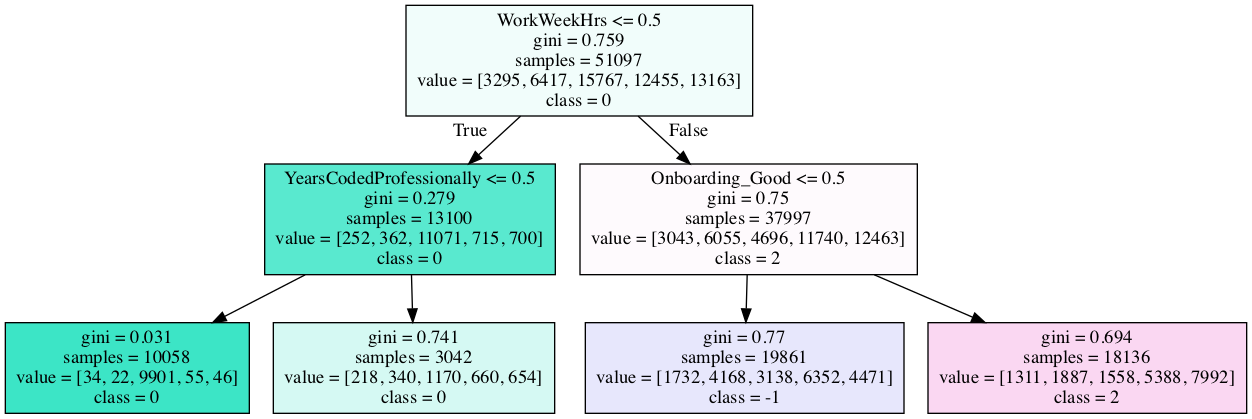

In [105]:
# This code will visualize a decision tree dt, trained with the attributes in X and the class labels in Y
dt_feature_names = list(X.columns)
dt_target_names = [str(s) for s in Y.unique()]
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

We know that in "Job Satisfaction" column the values are assigned as follows -
<ol>
<br>-2 - Very dissatisfied
<br>-1 - Slightly dissatisfied
<br>0 - Neither satisfied nor dissatisfied
<br>1 - Slightly satisfied
<br>2 - Very satisfied
</ol>


We are interested in class 2... i.e. "Very Satisfied" category

In [106]:
dfnew['Discretized_WorkWeekHrs']=pd.cut(dfnew.WorkWeekHrs,10)

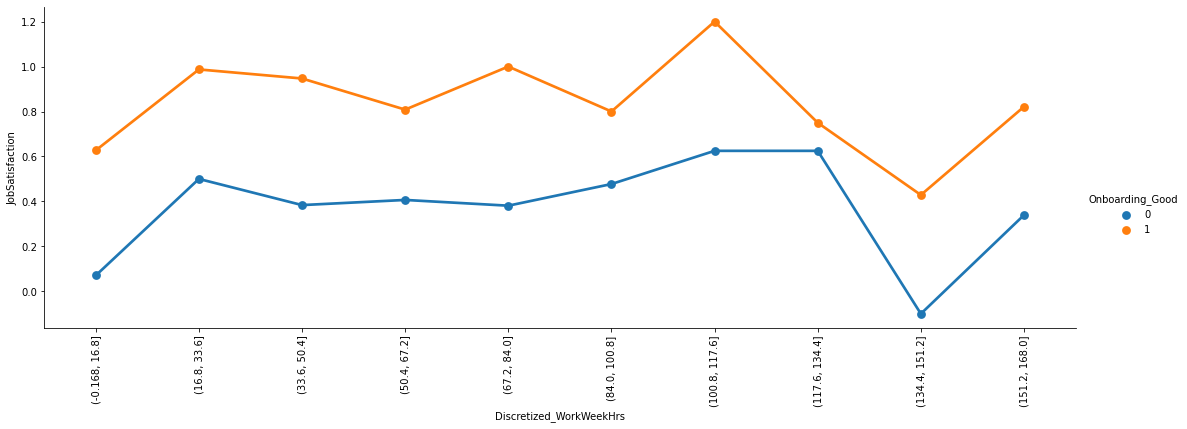

In [107]:
sns.catplot(x='Discretized_WorkWeekHrs', y='JobSatisfaction', hue='Onboarding_Good', data=dfnew, kind='point',aspect=3,\
           ci=None).set_xticklabels(rotation=90)

## Finding 1 : "Job Satisfaction"

#### We can conclude that the main factor which determines Job Satisfaction for people who are highly satisfied at their job is the         Onboarding Process . We can see that accross all the people irrespective of their working hours. We can also see that trend in the plot above. 

## Managerial Insight 1 : "Job Satisfaction"

#### Thus, we can also conclude that people are satisfied at work if they are joined in smoothly, with a robust HR process, feel included and more as a "part of their company". This seems to be the most significant factor determining highest satisfaction levels. Thus, we can see the importance of HR and on boarding procedures for new hires.

# Finding 2: What factors signify the developers who work the hardest?

In [108]:
dfdum['OrgGreater500'] = dfdum['OrgSize_1000-4999'] + dfdum['OrgSize_10000+'] + dfdum['OrgSize_5000-9999'] + \
                                 dfdum['OrgSize_500-999'] 

In [109]:
dfdum['OrgLess500'] = dfdum['OrgSize_10-19'] + dfdum['OrgSize_100-499'] + dfdum['OrgSize_2-9'] + \
                                 dfdum['Orgsize_20-99'] + dfdum['OrgSize_1']

In [110]:
dfdum['Stem'] = dfdum['Undergrad_OtherEngg'] + dfdum['Undergrad_ComputerScience'] + dfdum['Undergrad_InformationSys'] + \
                                 dfdum['Undergrad_MathStats'] + dfdum['Undergrad_WebDesign'] 

In [111]:
dfdum['Not_Stem'] = dfdum['Undergrad_Business'] + dfdum['Undergrad_HealthScience'] + dfdum['Undergrad_Humanities'] + \
                                 dfdum['Undergrad_NaturalScience'] + dfdum['Undergrad_SocialScience']+\
 dfdum['Undergrad_FineArts']+  dfdum['Undergrad_NeverDeclared']

In [112]:
dfdum.head(1)

,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,AnnualPay,Country,FormalEdu_Important,WorkWeekHrs,YearsCoded,YearsCodedProfessionally,DT_Enterprise Application,DT_Full-Stack,DT_Mobile,DT_Designer,DT_Front-End,DT_Back-End,DT_QA/Test,DT_DevOps specialist,DT_Game/Graphics,DT_Database administrator,DT_Embedded-Devices,DT_Data-Engineer,DT_Educator,DT_System administrator,DT_Engineering manager,DT_Product manager,DT_Data/Business-Analyst,DT_Academic researcher,DT_Data/ML_Specialist,DT_Scientist,DT_Senior executive/VP,"DT_Engineer, site reliability",DT_Marketing/Sales_Professional,Ethnicity_White/European_Decent,Ethnicity_Hispanic/Latino,Ethnicity_East Asian,Ethnicity_Black/African_Descent,Ethnicity_Middle Eastern,Ethnicity_NativeAmerican/PacificIslander/Australian),Ethnicity_South Asian,Ethnicity_Multiracial,Ethnicity_Biracial,Ethnicity_Southeast Asian,Gender_Man,Gender_Woman,Gender_Non-binary/Queer/Non-Conforming,JobF_Lang/Framework/Tech,JobF_Remote-Work,JobF_ProfessionalDevelopment,JobF_Flexible-Time,JobF_Company-Culture,JobF_Organization-Diversity,JobF_Family friendliness,JobF_Work-Impact/Useful,JobF_Industry,JobF_Org-Financial-Status,JobF_Specific-Department/Team,JobHunt_Curious_Other_Opportunities,JobHunt_WantWork_New_Technolgy,JobHunt_Better_Compensation,JobHunt_Growth/Leadership_Opportunities,JobHunt_Trouble_w/Direct_Manager,JobHunt_Trouble_w/Leadership_Company,JobHunt_Better_work/life_balance,JobHunt_Looking_Relocate,JobHunt_Bad_day/week/month_Work,JobHunt_Share_Accomplishments_w/WideNetwork,JobHunt_Trouble_w/Teammates,JobHunt_Just because,JobHuntResearch_company_media/employee_blogs/company_culture_videos,JobHuntResearch_Company_reviews_3rd_party_Glassdoor_Blind,JobHuntResearch_Public_financial_Information_Crunchbase,JobHuntResearch_Personal_Network/friends/family,JobHuntResearch_Media/News_Articles/founder_profiles/about_company,JobHuntResearch_Directly_current/past_employees,PR_Start a free trial,PR_Ask_developers_known/work_with,PR_Visit_developer_communities_StackOverflow,PR_rating/reviews_third_party_G2Crowd,PR_Research_companies_advertised_sites_visited,PR_Research_companies_emailed_me,MOOD_Amused,"MOOD_Hello, old friend",MOOD_Annoyed,MOOD_Indifferent,SO_public_Q&A_anyone_who_codes),SO_public_Q&A_variety_topics,SO_Job_seekers,SO_private_Q&A_Org,SO_Talent_hiring_companies/recruiters,SO_Advertising_technology_companies,SO_Never_Visited_sites,STUCK_Visit_Stack_Overflow,STUCK_Walk/physical_activity,STUCK_Other_work_come_back_later,STUCK_Call_coworker/friend,STUCK_Watch_help/tutorial_videos,STUCK_Visit_Other_developer_community,STUCK_Play_games,STUCK_Meditate,STUCK_Panic,Sexuality_Straight / Heterosexual,Sexuality_Gay or Lesbian,Sexuality_Queer,Sexuality_Bisexual,ED_Associate_Degree,ED_Bachelor's_Degree,ED_No_Formal_Education,ED_Master's_Degree,ED_Doctoral_Degree,ED_Primary_School,ED_Professional_Degree,ED_Secondary_School,ED_College_Without_Degree,Employment_Full_Time,Employment_Part_Time,Employment_Freelancer,Employment_Not_Interested,Employment_Interested,Employment_Retired,Employment_Student,JobSeek_Actively_Looking,JobSeek_Not_Interested,JobSeek_Interested,OverTime_Never,OverTime_Ocassionally,OverTime_Often,OverTime_Rarely,OverTime_Sometimes,OpSys_BSD,OpSys_Linux-based,OpSys_MacOS,OpSys_Windows,OrgSize_1000-4999,OrgSize_10-19,OrgSize_10000+,OrgSize_100-499,OrgSize_2-9,Orgsize_20-99,OrgSize_5000-9999,OrgSize_500-999,OrgSize_1,SurveyEase_Difficult,SurveyEase_Easy,SurveyEase_Neutral,SurveyLength_Appropriate,SurveyLength_Too long,SurveyLength_Too short,Undergrad_Business,Undergrad_HealthScience,Undergrad_Humanities,Undergrad_NaturalScience,Undergrad_SocialScience,Undergrad_OtherEngg,Undergrad_ComputerScience,Undergrad_FineArts,Undergrad_NeverDeclared,Undergrad_InformationSys,Undergrad_MathStats,Undergrad_WebDesign,JobSatisfaction,Have_DevOps,DevOps_Important,Learning_Frequency,Onboarding_Good,Other_DevCommunity,SOAccount_Exist,SO_Community,SO_PartFreq,SO_VisitFreq,Transgender,Welcome_change,Database_Num_Desired,Database_Work

In [113]:
%pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [114]:
import sys

In [115]:
import warnings
#suppress all future warning
warnings.filterwarnings('ignore')

In [116]:
dfdum ['OrgSize'] = df.OrgSize

In [117]:
selected_columns1 = dfdum[['Hobbyist','Age','Age1stCode','WorkWeekHrs','YearsCoded','YearsCodedProfessionally',\
                      'ED_Associate_Degree','ED_Bachelor\'s_Degree','ED_No_Formal_Education',\
                      'ED_Master\'s_Degree','ED_Doctoral_Degree','ED_Primary_School','ED_Professional_Degree',\
                      'ED_Secondary_School','ED_College_Without_Degree','Employment_Full_Time','Employment_Part_Time',\
                      'Employment_Freelancer','Employment_Not_Interested','Employment_Interested','Employment_Retired',\
                    'Employment_Student','JobSatisfaction','Learning_Frequency','N_Language_Worked',\
                     'N_Misc_Tech_Worked','N_Platform_Worked','N_WebFrame_Worked','N_CollabTools_Worked','OrgGreater500','OrgLess500',
                           'Stem', 'Not_Stem','AnnualPay']]


In [118]:
new_df = selected_columns1.copy()

In [119]:
new_df.shape

(51097, 34)

In [120]:
new_df.head(5)

,Hobbyist,Age,Age1stCode,WorkWeekHrs,YearsCoded,YearsCodedProfessionally,ED_Associate_Degree,ED_Bachelor's_Degree,ED_No_Formal_Education,ED_Master's_Degree,ED_Doctoral_Degree,ED_Primary_School,ED_Professional_Degree,ED_Secondary_School,ED_College_Without_Degree,Employment_Full_Time,Employment_Part_Time,Employment_Freelancer,Employment_Not_Interested,Employment_Interested,Employment_Retired,Employment_Student,JobSatisfaction,Learning_Frequency,N_Language_Worked,N_Misc_Tech_Worked,N_Platform_Worked,N_WebFrame_Worked,N_CollabTools_Worked,OrgGreater500,OrgLess500,Stem,Not_Stem,AnnualPay
0,1.00,30.86,13,50.00,36,27,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1.00,2.00,6,2,1,2,5,0,1,1,0,104187.60
1,0.00,30.86,19,0.00,7,4,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,-2.00,2.00,5,1,1,0,5,1,0,1,0,104187.60
2,1.00,30.86,15,0.00,4,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,4,0,0,0,0,0,0,0,0,104187.60
3,1.00,25.00,18,40.00,7,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,-1.00,2.00,0,0,0,0,0,0,1,1,0,104187.60
4,1.00,31.00,16,0.00,15,8,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.00,2.00,5,1,5,1,4,0,0,1,0,104187.60


In [121]:
X = new_df.drop('OrgLess500',axis=1)
Y = new_df.OrgGreater500
X = new_df.drop('OrgGreater500',axis=1)

In [122]:
Y = new_df.OrgLess500

In [123]:
new_df.YearsCodedProfessionally.fillna(value =0,inplace = True)
new_df.YearsCodedProfessionally.isna().sum()

0

In [124]:
X = new_df
X['Age1stCode'] = X ['Age1stCode'].astype(int64)
X = X.drop('OrgGreater500',axis=1)
X = X.drop('OrgLess500',axis=1)
X.drop('AnnualPay', axis=1, inplace=True)


In [125]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

kmeans = KMeans(n_clusters=20, random_state=0)
kmeans.fit(X)

KMeans(n_clusters=20, random_state=0)

(51097, 31)

,Hobbyist,Age,Age1stCode,WorkWeekHrs,ED_Associate_Degree,ED_Bachelor's_Degree,ED_No_Formal_Education,ED_Master's_Degree,ED_Doctoral_Degree,ED_Primary_School,ED_Professional_Degree,ED_Secondary_School,ED_College_Without_Degree,Employment_Full_Time,Employment_Part_Time,Employment_Freelancer,Employment_Not_Interested,Employment_Interested,Employment_Retired,Employment_Student,JobSatisfaction,Learning_Frequency,N_Language_Worked,N_Misc_Tech_Worked,N_Platform_Worked,N_WebFrame_Worked,N_CollabTools_Worked,Stem,Not_Stem
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5,0.83,37.05,10.07,39.60,0.03,0.38,0.01,0.31,0.07,0.01,0.01,0.04,0.13,0.87,0.02,0.11,0.00,0.00,0.00,0.00,0.75,1.86,7.57,1.79,3.70,2.26,3.61,0.81,0.12
7,0.76,45.54,11.91,39.62,0.02,0.39,0.00,0.29,0.07,0.00,0.02,0.04,0.16,0.83,0.02,0.15,0.00,0.00,0.00,0.00,0.77,1.69,6.86,1.51,3.21,1.74,3.15,0.76,0.17
3,0.85,28.32,12.16,39.44,0.03,0.50,0.00,0.27,0.02,0.00,0.01,0.05,0.11,0.92,0.02,0.06,0.00,0.00,0.00,0.00,0.77,2.15,7.96,2.07,3.96,2.82,3.91,0.86,0.08
13,0.77,44.55,12.63,56.41,0.02,0.33,0.00,0.30,0.10,0.01,0.03,0.04,0.15,0.69,0.01,0.30,0.00,0.00,0.00,0.00,0.71,1.82,7.48,1.90,3.89,2.00,3.19,0.76,0.17
17,0.82,33.97,13.70,52.95,0.03,0.38,0.01,0.31,0.08,0.01,0.01,0.03,0.13,0.81,0.01,0.18,0.00,0.00,0.00,0.00,0.66,2.03,7.55,2.05,4.06,2.53,3.56,0.77,0.16
4,0.75,43.80,13.75,2.29,0.04,0.36,0.00,0.30,0.08,0.00,0.03,0.03,0.12,0.69,0.02,0.28,0.00,0.00,0.00,0.00,0.42,1.69,7.00,1.57,3.33,1.66,2.96,0.76,0.17
6,0.88,20.08,13.98,0.13,0.03,0.29,0.01,0.04,0.00,0.08,0.00,0.32,0.19,0.08,0.05,0.04,0.01,0.10,0.00,0.72,0.02,2.44,7.14,1.67,2.92,1.66,2.12,0.54,0.04
15,0.78,33.27,14.08,1.51,0.02,0.38,0.01,0.33,0.05,0.01,0.02,0.04,0.12,0.64,0.03,0.15,0.02,0.10,0.01,0.05,0.29,1.89,6.79,1.70,3.31,2.19,3.12,0.81,0.11
10,0.75,33.89,14.30,39.59,0.03,0.44,0.00,0.32,0.05,0.00,0.01,0.03,0.10,0.90,0.02,0.08,0.00,0.00,0.00,0.00,0.64,1.84,6.76,1.57,3.20,2.19,3.63,0.85,0.10


Text(0.5, 0, 'Age1stCoded')

Text(0, 0.5, 'HoursWorkingPerWeek')

<BarContainer object of 20 artists>

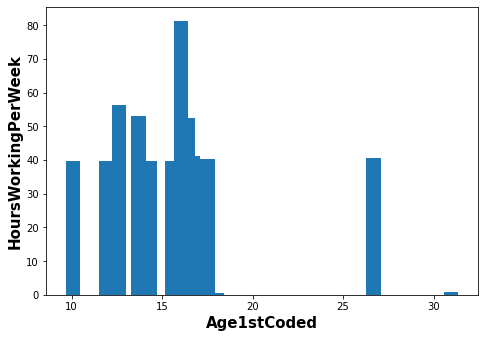

In [126]:
Xcopy = X.copy()
Xcopy.shape
Xcopy['cluster'] = kmeans.labels_
M = Xcopy.groupby('cluster').mean()
M.sort_values(by=['Age1stCode'])
x_axis = M['Age1stCode']
y_axis = M['WorkWeekHrs']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.xlabel('Age1stCoded', fontweight ='bold', fontsize = 15)
plt.ylabel('HoursWorkingPerWeek', fontweight ='bold', fontsize = 15)
ax.bar(x_axis, y_axis)
plt.show()

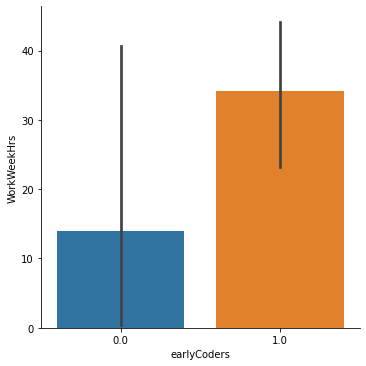

In [127]:
M['earlyCoders']= (M.Age1stCode <= 18.03) + 0.0 
#we choose the value 18.03 as we observe the difference is high in clustering below and above this age

sns.catplot(x='earlyCoders', y='WorkWeekHrs', data=M, kind='bar')

## Finding 2 : "Early Coders"

#### We observe that statistically, developers who started coding early tend to work longer / harder.

## Managerial Insight 2 : "Early Coders" 

#### Thus we conclude that companies can hire more people who have started coding early, i.e. below 18 yrs , who tend to show more passion towards coding and thus increase productivity of the hiring company.

# Finding 3: What are the important Job Factors for developers when they hunt for a new job?

In [128]:
dfdum.head()

,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,AnnualPay,Country,FormalEdu_Important,WorkWeekHrs,YearsCoded,YearsCodedProfessionally,DT_Enterprise Application,DT_Full-Stack,DT_Mobile,DT_Designer,DT_Front-End,DT_Back-End,DT_QA/Test,DT_DevOps specialist,DT_Game/Graphics,DT_Database administrator,DT_Embedded-Devices,DT_Data-Engineer,DT_Educator,DT_System administrator,DT_Engineering manager,DT_Product manager,DT_Data/Business-Analyst,DT_Academic researcher,DT_Data/ML_Specialist,DT_Scientist,DT_Senior executive/VP,"DT_Engineer, site reliability",DT_Marketing/Sales_Professional,Ethnicity_White/European_Decent,Ethnicity_Hispanic/Latino,Ethnicity_East Asian,Ethnicity_Black/African_Descent,Ethnicity_Middle Eastern,Ethnicity_NativeAmerican/PacificIslander/Australian),Ethnicity_South Asian,Ethnicity_Multiracial,Ethnicity_Biracial,Ethnicity_Southeast Asian,Gender_Man,Gender_Woman,Gender_Non-binary/Queer/Non-Conforming,JobF_Lang/Framework/Tech,JobF_Remote-Work,JobF_ProfessionalDevelopment,JobF_Flexible-Time,JobF_Company-Culture,JobF_Organization-Diversity,JobF_Family friendliness,JobF_Work-Impact/Useful,JobF_Industry,JobF_Org-Financial-Status,JobF_Specific-Department/Team,JobHunt_Curious_Other_Opportunities,JobHunt_WantWork_New_Technolgy,JobHunt_Better_Compensation,JobHunt_Growth/Leadership_Opportunities,JobHunt_Trouble_w/Direct_Manager,JobHunt_Trouble_w/Leadership_Company,JobHunt_Better_work/life_balance,JobHunt_Looking_Relocate,JobHunt_Bad_day/week/month_Work,JobHunt_Share_Accomplishments_w/WideNetwork,JobHunt_Trouble_w/Teammates,JobHunt_Just because,JobHuntResearch_company_media/employee_blogs/company_culture_videos,JobHuntResearch_Company_reviews_3rd_party_Glassdoor_Blind,JobHuntResearch_Public_financial_Information_Crunchbase,JobHuntResearch_Personal_Network/friends/family,JobHuntResearch_Media/News_Articles/founder_profiles/about_company,JobHuntResearch_Directly_current/past_employees,PR_Start a free trial,PR_Ask_developers_known/work_with,PR_Visit_developer_communities_StackOverflow,PR_rating/reviews_third_party_G2Crowd,PR_Research_companies_advertised_sites_visited,PR_Research_companies_emailed_me,MOOD_Amused,"MOOD_Hello, old friend",MOOD_Annoyed,MOOD_Indifferent,SO_public_Q&A_anyone_who_codes),SO_public_Q&A_variety_topics,SO_Job_seekers,SO_private_Q&A_Org,SO_Talent_hiring_companies/recruiters,SO_Advertising_technology_companies,SO_Never_Visited_sites,STUCK_Visit_Stack_Overflow,STUCK_Walk/physical_activity,STUCK_Other_work_come_back_later,STUCK_Call_coworker/friend,STUCK_Watch_help/tutorial_videos,STUCK_Visit_Other_developer_community,STUCK_Play_games,STUCK_Meditate,STUCK_Panic,Sexuality_Straight / Heterosexual,Sexuality_Gay or Lesbian,Sexuality_Queer,Sexuality_Bisexual,ED_Associate_Degree,ED_Bachelor's_Degree,ED_No_Formal_Education,ED_Master's_Degree,ED_Doctoral_Degree,ED_Primary_School,ED_Professional_Degree,ED_Secondary_School,ED_College_Without_Degree,Employment_Full_Time,Employment_Part_Time,Employment_Freelancer,Employment_Not_Interested,Employment_Interested,Employment_Retired,Employment_Student,JobSeek_Actively_Looking,JobSeek_Not_Interested,JobSeek_Interested,OverTime_Never,OverTime_Ocassionally,OverTime_Often,OverTime_Rarely,OverTime_Sometimes,OpSys_BSD,OpSys_Linux-based,OpSys_MacOS,OpSys_Windows,OrgSize_1000-4999,OrgSize_10-19,OrgSize_10000+,OrgSize_100-499,OrgSize_2-9,Orgsize_20-99,OrgSize_5000-9999,OrgSize_500-999,OrgSize_1,SurveyEase_Difficult,SurveyEase_Easy,SurveyEase_Neutral,SurveyLength_Appropriate,SurveyLength_Too long,SurveyLength_Too short,Undergrad_Business,Undergrad_HealthScience,Undergrad_Humanities,Undergrad_NaturalScience,Undergrad_SocialScience,Undergrad_OtherEngg,Undergrad_ComputerScience,Undergrad_FineArts,Undergrad_NeverDeclared,Undergrad_InformationSys,Undergrad_MathStats,Undergrad_WebDesign,JobSatisfaction,Have_DevOps,DevOps_Important,Learning_Frequency,Onboarding_Good,Other_DevCommunity,SOAccount_Exist,SO_Community,SO_PartFreq,SO_VisitFreq,Transgender,Welcome_change,Database_Num_Desired,Database_Work

In [129]:
dfdum['JobHunt']= dfdum['JobHunt_Curious_Other_Opportunities'] + dfdum['JobHunt_WantWork_New_Technolgy'] + \
                  dfdum['JobHunt_Better_Compensation'] + dfdum['JobHunt_Growth/Leadership_Opportunities'] + \
                  dfdum['JobHunt_Trouble_w/Direct_Manager'] + dfdum['JobHunt_Trouble_w/Leadership_Company'] + \
                  dfdum['JobHunt_Better_work/life_balance'] + dfdum['JobHunt_Looking_Relocate'] + dfdum['JobHunt_Bad_day/week/month_Work'] + \
                  dfdum['JobHunt_Share_Accomplishments_w/WideNetwork'] + dfdum['JobHunt_Trouble_w/Teammates'] + dfdum['JobHunt_Just because']

In [130]:
len(dfdum[dfdum.JobHunt != 0])

39680

In [131]:
dfJobHunt = dfdum[dfdum.JobHunt != 0]

In [132]:
dfJobHunt.head()

,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,AnnualPay,Country,FormalEdu_Important,WorkWeekHrs,YearsCoded,YearsCodedProfessionally,DT_Enterprise Application,DT_Full-Stack,DT_Mobile,DT_Designer,DT_Front-End,DT_Back-End,DT_QA/Test,DT_DevOps specialist,DT_Game/Graphics,DT_Database administrator,DT_Embedded-Devices,DT_Data-Engineer,DT_Educator,DT_System administrator,DT_Engineering manager,DT_Product manager,DT_Data/Business-Analyst,DT_Academic researcher,DT_Data/ML_Specialist,DT_Scientist,DT_Senior executive/VP,"DT_Engineer, site reliability",DT_Marketing/Sales_Professional,Ethnicity_White/European_Decent,Ethnicity_Hispanic/Latino,Ethnicity_East Asian,Ethnicity_Black/African_Descent,Ethnicity_Middle Eastern,Ethnicity_NativeAmerican/PacificIslander/Australian),Ethnicity_South Asian,Ethnicity_Multiracial,Ethnicity_Biracial,Ethnicity_Southeast Asian,Gender_Man,Gender_Woman,Gender_Non-binary/Queer/Non-Conforming,JobF_Lang/Framework/Tech,JobF_Remote-Work,JobF_ProfessionalDevelopment,JobF_Flexible-Time,JobF_Company-Culture,JobF_Organization-Diversity,JobF_Family friendliness,JobF_Work-Impact/Useful,JobF_Industry,JobF_Org-Financial-Status,JobF_Specific-Department/Team,JobHunt_Curious_Other_Opportunities,JobHunt_WantWork_New_Technolgy,JobHunt_Better_Compensation,JobHunt_Growth/Leadership_Opportunities,JobHunt_Trouble_w/Direct_Manager,JobHunt_Trouble_w/Leadership_Company,JobHunt_Better_work/life_balance,JobHunt_Looking_Relocate,JobHunt_Bad_day/week/month_Work,JobHunt_Share_Accomplishments_w/WideNetwork,JobHunt_Trouble_w/Teammates,JobHunt_Just because,JobHuntResearch_company_media/employee_blogs/company_culture_videos,JobHuntResearch_Company_reviews_3rd_party_Glassdoor_Blind,JobHuntResearch_Public_financial_Information_Crunchbase,JobHuntResearch_Personal_Network/friends/family,JobHuntResearch_Media/News_Articles/founder_profiles/about_company,JobHuntResearch_Directly_current/past_employees,PR_Start a free trial,PR_Ask_developers_known/work_with,PR_Visit_developer_communities_StackOverflow,PR_rating/reviews_third_party_G2Crowd,PR_Research_companies_advertised_sites_visited,PR_Research_companies_emailed_me,MOOD_Amused,"MOOD_Hello, old friend",MOOD_Annoyed,MOOD_Indifferent,SO_public_Q&A_anyone_who_codes),SO_public_Q&A_variety_topics,SO_Job_seekers,SO_private_Q&A_Org,SO_Talent_hiring_companies/recruiters,SO_Advertising_technology_companies,SO_Never_Visited_sites,STUCK_Visit_Stack_Overflow,STUCK_Walk/physical_activity,STUCK_Other_work_come_back_later,STUCK_Call_coworker/friend,STUCK_Watch_help/tutorial_videos,STUCK_Visit_Other_developer_community,STUCK_Play_games,STUCK_Meditate,STUCK_Panic,Sexuality_Straight / Heterosexual,Sexuality_Gay or Lesbian,Sexuality_Queer,Sexuality_Bisexual,ED_Associate_Degree,ED_Bachelor's_Degree,ED_No_Formal_Education,ED_Master's_Degree,ED_Doctoral_Degree,ED_Primary_School,ED_Professional_Degree,ED_Secondary_School,ED_College_Without_Degree,Employment_Full_Time,Employment_Part_Time,Employment_Freelancer,Employment_Not_Interested,Employment_Interested,Employment_Retired,Employment_Student,JobSeek_Actively_Looking,JobSeek_Not_Interested,JobSeek_Interested,OverTime_Never,OverTime_Ocassionally,OverTime_Often,OverTime_Rarely,OverTime_Sometimes,OpSys_BSD,OpSys_Linux-based,OpSys_MacOS,OpSys_Windows,OrgSize_1000-4999,OrgSize_10-19,OrgSize_10000+,OrgSize_100-499,OrgSize_2-9,Orgsize_20-99,OrgSize_5000-9999,OrgSize_500-999,OrgSize_1,SurveyEase_Difficult,SurveyEase_Easy,SurveyEase_Neutral,SurveyLength_Appropriate,SurveyLength_Too long,SurveyLength_Too short,Undergrad_Business,Undergrad_HealthScience,Undergrad_Humanities,Undergrad_NaturalScience,Undergrad_SocialScience,Undergrad_OtherEngg,Undergrad_ComputerScience,Undergrad_FineArts,Undergrad_NeverDeclared,Undergrad_InformationSys,Undergrad_MathStats,Undergrad_WebDesign,JobSatisfaction,Have_DevOps,DevOps_Important,Learning_Frequency,Onboarding_Good,Other_DevCommunity,SOAccount_Exist,SO_Community,SO_PartFreq,SO_VisitFreq,Transgender,Welcome_change,Database_Num_Desired,Database_Work

In [133]:
dict_plot3={'JobFactor':['Remote-Work', 'ProfessionalDevelopment', 'Flexible-Time', 'Company-Culture',\
                        'Organization-Diversity','Family friendliness','Work-Impact/Useful','Industry',\
                        'Org-Financial-Status','Specific-Department/Team'],
           'Count':[sum(dfJobHunt['JobF_Remote-Work']),sum(dfJobHunt['JobF_ProfessionalDevelopment']),\
                   sum(dfJobHunt['JobF_Flexible-Time']),sum(dfJobHunt['JobF_Company-Culture']),\
                   sum(dfJobHunt['JobF_Organization-Diversity']),sum(dfJobHunt['JobF_Family friendliness']),\
                   sum(dfJobHunt['JobF_Work-Impact/Useful']),sum(dfJobHunt['JobF_Industry']),\
                   sum(dfJobHunt['JobF_Org-Financial-Status']),sum(dfJobHunt['JobF_Specific-Department/Team'])]}

In [134]:
dict_plot3

{'JobFactor': ['Remote-Work',
  'ProfessionalDevelopment',
  'Flexible-Time',
  'Company-Culture',
  'Organization-Diversity',
  'Family friendliness',
  'Work-Impact/Useful',
  'Industry',
  'Org-Financial-Status',
  'Specific-Department/Team'],
 'Count': [13506, 16001, 17478, 17621, 2571, 4646, 8061, 5635, 4560, 4463]}

In [135]:
plot3=pd.DataFrame(dict_plot3, columns=['JobFactor','Count'])

In [136]:
plot3

,JobFactor,Count
0,Remote-Work,13506
1,ProfessionalDevelopment,16001
2,Flexible-Time,17478
3,Company-Culture,17621
4,Organization-Diversity,2571
5,Family friendliness,4646
6,Work-Impact/Useful,8061
7,Industry,5635
8,Org-Financial-Status,4560
9,Specific-Department/Team,4463


<AxesSubplot:xlabel='JobFactor'>

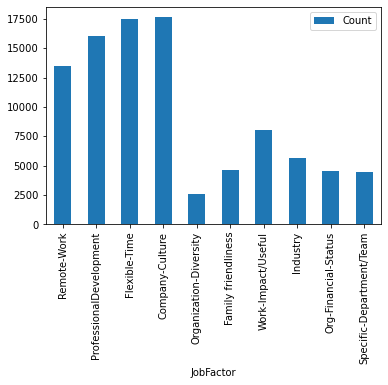

In [137]:
plot3.plot(x='JobFactor',y='Count',kind='bar')

In [138]:
dfdum.JobHunt.unique()

array([ 0,  2,  7,  3,  6,  1,  5,  4,  8,  9, 10, 11])

In [139]:
dfdum.JobHunt=dfdum.JobHunt.apply(lambda x: 0 if x==0 else 1) #Coverting the new column Job Hunt to binary

In [140]:
dfdum.JobHunt.unique()

array([0, 1])

In [141]:
dfdum.groupby('JobHunt')['Gender_Man'].mean()

JobHunt
0   0.87
1   0.95
Name: Gender_Man, dtype: float64

In [142]:
dfdum.groupby('JobHunt')['Gender_Woman'].mean()

JobHunt
0   0.07
1   0.07
Name: Gender_Woman, dtype: float64

In [143]:
dfdum.groupby('JobHunt')['Gender_Non-binary/Queer/Non-Conforming'].mean()

JobHunt
0   0.01
1   0.01
Name: Gender_Non-binary/Queer/Non-Conforming, dtype: float64

## Finding 3 : Important Job Factors when searching for a New Job

#### We segregated people hunting for Jobs and looked at the most important factors for them when deciding between two jobs with the same compensation, benefits and location. Of the following factors the most important ones are the ability to work remotely (note that this survey was take pre-pandemic), professional development, flexible time and the most important one is company culture. Its highly surprising that diversity, family friendliness, financial status, specefic department/team, industry and most importantly the usefulness or the impact of their work is not as important. 

## Managerial Insight 3 : Important Job Factors when searching for a New Job

#### We can conclude that companies need to maintain a good work culture and provide remote work possibilties, flexible timings and spaxce for professional development for more talent to come in and flourish at their jobs and increase productivity.

# Finding 4: Does Organization size have an impact in the level of expertise amongst Developers?

In [144]:
dfdum['Expert/Knowledgeable'] = dfdum['Database_Worked'] + dfdum['N_Language_Worked'] + dfdum['N_Misc_Tech_Worked'] + \
                                dfdum['N_Platform_Worked'] + dfdum['N_WebFrame_Worked'] + dfdum['N_CollabTools_Worked']

In [145]:
df1 = dfdum.groupby(['MainBranch','OrgSize']).agg({'Expert/Knowledgeable':'mean', 'Age':'mean','JobHunt':'mean', \
                                                   'AnnualPay':'mean'})

In [146]:
df1 = df1.reset_index()

In [147]:
df1

,MainBranch,OrgSize,Expert/Knowledgeable,Age,JobHunt,AnnualPay
0,PartTimeDeveloper,"1,000 to 4,999 employees",16.46,35.03,0.93,107059.39
1,PartTimeDeveloper,10 to 19 employees,17.61,32.97,0.91,71518.33
2,PartTimeDeveloper,"10,000 or more employees",16.37,34.49,0.92,141521.91
3,PartTimeDeveloper,100 to 499 employees,16.93,34.17,0.93,127071.33
4,PartTimeDeveloper,2 to 9 employees,16.48,34.41,0.88,78274.74
5,PartTimeDeveloper,20 to 99 employees,17.25,33.57,0.92,99795.75
6,PartTimeDeveloper,"5,000 to 9,999 employees",16.68,34.16,0.91,150576.09
7,PartTimeDeveloper,500 to 999 employees,16.75,35.14,0.96,117431.12
8,PartTimeDeveloper,"Just me - I am a freelancer, sole proprietor, ...",15.52,41.06,0.85,89256.36
9,ProfessionalDeveloper,"1,000 to 4,999 employees",20.07,32.39,0.95,123034.90


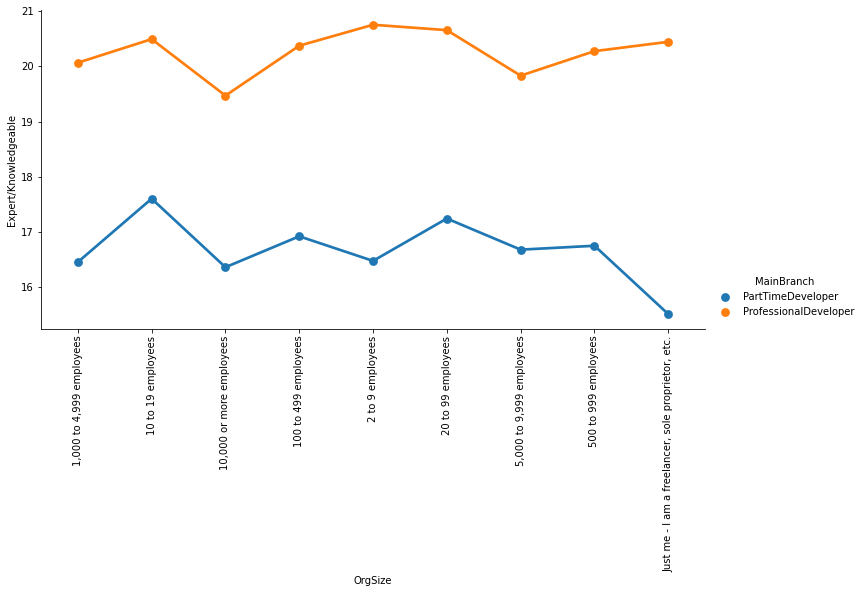

In [148]:
sns.catplot(y = 'Expert/Knowledgeable', x ='OrgSize', data = df1, kind='point',hue = 'MainBranch', aspect=2,\
           ci=None).set_xticklabels(rotation=90)

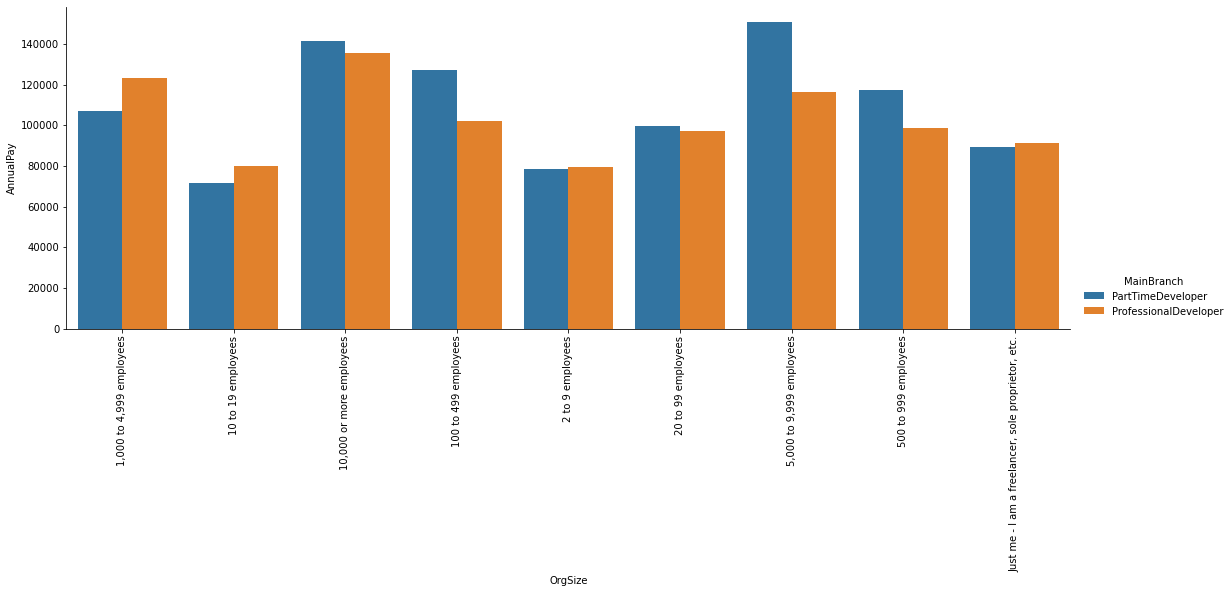

In [149]:
sns.catplot(y = 'AnnualPay', x ='OrgSize', data = df1, kind='bar',hue = 'MainBranch', aspect=3,\
           ci=None).set_xticklabels(rotation=90)

## Finding 4 : Impact of Organization size on Skill Expertise


#### Here, we aggregated the Languages, Database, Platform, Webframe, Miscellaneous Technolgies and New Collaborative tools that the developers have worked with and have some set of expertise in these skillsets. We grouped by the developer's branch and see some results for Part-Time and Professional Developers. We can that most Professional developers belonging to the smaller size organizations like 2 to 9, 10 t 19 and 20 to 99, have a higher level of expertise when compared to the others like 10,000+ Organization size. It is quite clear that the smaller organization employees have access to work on a broader scale across various technologies and platforms than bigger organizations. The employees in this bracket also have a lesser Annual Pay compared to the bigger organizations.

## Managerial Insight 3 : Impact of Organization size on Skill Expertise

#### We can conclude that the managers from bigger organizations could pick out talent from smaller organizations based on this criteria of the level of skill expertise. Since these employees have a lesser Annual Pay, the managers could also offer a better compensation just enough to attract them with a job offer and at the same time making it cost effective to the company as they get employees with better experience and not much Compensation expectation. 
#### Also Interesting fact is that Part time developers are paid higher than full time developers in such large organizations. This could imply that they are trying to outsource resources but at a higher cost which can be avoided by replacing them with employees from smaller organizations